## Analyzing and forecasting forest coverage impacts on air quality and the transmission of Covid-19 in India using machine learning
(Completed November 2020)

The Covid-19 virus spreads respiratorily as people come in contact with one another. Preliminary evidence in the United States (as of November 2020) shows that environmental factors such as forest density and air quality may have an impact on the spread and mortality rate of Covid-19 ([Costello, 2020](https://scopeblog.stanford.edu/2020/07/17/why-air-pollution-is-linked-to-severe-cases-of-covid-19/)).
- Repiratory and cardiovascular complications are impacted by air quality ([Forouzanfar et al., 2017](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(17)32366-8/fulltext#articleInformation)).
- Air quality depends on the capacity of trees to remove air pollutants and eliminate volatile organic compounds that contribute to ozone and PM2.5 formation ([Chameides et al.,1988](https://www.science.org/doi/10.1126/science.3420404)). 
- India has high air pollution from urbanization and industry, particularly from the energy sector which might worsen the transmission of Covid-19 ([Contreras and Ferri, 2016](https://www.sciencedirect.com/science/article/pii/S187705091630758X)). 

This analysis investigates the relationship between forest coverage and air quality with the number of Covid-19 cases in India. It aims to answer the following question: <em>Does high forest coverage slow the spread of Covid-19 and minimize cases in India due to better air quality?</em>

The data used in this analysis is from open source resources:
- AnuragAnalog. (2020, June 19). Geodata-of-India [Dataset](https://github.com/AnuragAnalog/Geodata-of-India)
- Development Data Lab. (2020, April 14). Development Data Lab [Dataset](http://www.devdatalab.org/covid)
- Socioeconomic High-resolution Rural-Urban Geographic Platform


In [32]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
import pandas as pd
from pandas.plotting import scatter_matrix
import osmnx as ox, geopandas as gpd
import time
import requests
import IPython
from IPython.core.display import HTML
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'
from pysal.lib import weights
from libpysal.io import open as psopen
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import cluster

In [3]:
# Read in final dataframe
# See 01_Koid_Covid_India_ML_EDA.ipynb file for how data was cleaned 
finaldata = pd.read_csv("data/finaldf.csv",encoding='utf-8') 
finaldata.tail() 

,state,pc11_state_id,TotHosp,TotDocs,UrbanShare,PopDens,SlumPop,TotPop,WorkPop,mean_pollution,num_cells,total_forest2000,max_forest2000,total_forest2001,max_forest2001,total_forest2002,max_forest2002,total_forest2003,max_forest2003,total_forest2004,max_forest2004,total_forest2005,max_forest2005,total_forest2006,max_forest2006,total_forest2007,max_forest2007,total_forest2008,max_forest2008,total_forest2009,max_forest2009,total_forest2010,max_forest2010,total_forest2011,max_forest2011,total_forest2012,max_forest2012,total_forest2013,max_forest2013,total_forest2014,max_forest2014,ec13_state_id,Mean_total_forest_2000_2014,Mean_max_forest_2000_2014,new_deaths,total_cases,Avg
23,Karnataka,29,272,3532.000000,0.234440,436.183207,3.291434e+06,61095297.0,27872597.0,774.661303,127.484939,1028.178619,14.878362,1130.276966,16.733241,1276.545528,15.606040,980.095507,12.843329,1245.864856,16.072215,1137.732896,15.346763,1283.280035,16.542074,1165.270251,15.742220,1122.382487,15.632247,1379.629945,19.881969,1411.340279,19.064234,1442.980929,18.601435,1111.594682,14.316488,1064.997084,15.637504,1445.778750,19.104716,29.0,1215.063254,16.400189,19,8168,112012.428571
24,Goa,30,16,589.000000,0.521562,552.891793,2.624700e+04,1458545.0,577248.0,50.579904,170.544271,3856.984375,42.065104,4783.716146,49.570312,4152.747396,41.059896,3920.833333,42.692708,4397.890625,44.398438,3521.908854,35.710938,4930.419271,48.062500,3639.588542,37.197917,4138.179688,41.562500,4106.539062,43.372396,5415.304688,50.843750,4592.119792,46.000000,3791.156250,40.924479,4151.070312,42.953125,4806.403646,45.815104,30.0,4280.324132,43.481944,0,204,259238.142857
25,Kerala,32,168,2662.000000,0.383589,1193.093252,2.020480e+05,33406061.0,11619063.0,244.453823,457.574983,19219.919143,60.964755,18357.166551,59.013822,17745.251555,59.285418,17215.974430,58.903248,18961.175536,60.832757,17705.021424,56.899793,17609.961990,58.889426,14551.529371,50.004147,17045.055287,53.475466,16857.465791,52.970974,19414.081548,60.781617,18060.366966,56.160332,17054.247408,57.286109,14749.918452,51.092605,17673.019350,57.248791,32.0,17481.343654,56.920617,4,11715,115679.857143
26,Tamil Nadu,33,399,5338.144928,0.355546,836.535296,5.798459e+06,72147030.0,32884681.0,922.897678,140.043170,1218.926933,19.781493,1190.334492,21.980153,927.230959,13.321092,964.835725,15.079578,1120.135074,17.269389,1319.027874,18.198723,1197.412743,18.147273,1251.646356,19.828140,1427.706845,20.505215,1176.237406,15.875419,1589.671323,23.123317,1373.974591,20.580621,1084.965362,15.827192,1019.388534,16.321155,1192.738449,16.464320,33.0,1203.615511,18.153539,24,29235,110255.285714
27,Puducherry,34,13,609.000000,0.613956,3481.217914,1.445730e+05,1247953.0,444968.0,109.129658,97.780000,873.340000,22.120000,994.810000,27.160000,714.060000,16.680000,735.640000,17.490000,1063.630000,24.360000,1002.120000,20.900000,1076.880000,23.820000,1105.390000,28.260000,1204.240000,25.750000,859.120000,17.760000,1403.300000,28.380000,1115.540000,24.340000,847.880000,20.390000,1156.550000,29.460000,975.370000,21.350000,34.0,1008.524667,23.214667,0,179,124056.142857


In [4]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        28 non-null     object 
 1   pc11_state_id                28 non-null     int64  
 2   TotHosp                      28 non-null     int64  
 3   TotDocs                      28 non-null     float64
 4   UrbanShare                   28 non-null     float64
 5   PopDens                      28 non-null     float64
 6   SlumPop                      28 non-null     float64
 7   TotPop                       28 non-null     float64
 8   WorkPop                      28 non-null     float64
 9   mean_pollution               28 non-null     float64
 10  num_cells                    28 non-null     float64
 11  total_forest2000             28 non-null     float64
 12  max_forest2000               28 non-null     float64
 13  total_forest2001      

In [6]:
abb = gpd.read_file('data/India.shp')
abb=abb.rename(columns={'st_nm':'state'})
abb

,id,state,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."
5,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406..."
6,None,Dadra and Nagar Haveli,"POLYGON ((73.20640 20.12165, 73.20865 20.10695..."
7,None,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463..."
8,None,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698..."
9,None,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23..."


In [7]:
final = pd.merge(abb,finaldata)
final.to_csv (r'data\Finalwithmap.csv', index = True, header=True)
final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           0 non-null      object  
 1   state                        28 non-null     object  
 2   geometry                     28 non-null     geometry
 3   pc11_state_id                28 non-null     int64   
 4   TotHosp                      28 non-null     int64   
 5   TotDocs                      28 non-null     float64 
 6   UrbanShare                   28 non-null     float64 
 7   PopDens                      28 non-null     float64 
 8   SlumPop                      28 non-null     float64 
 9   TotPop                       28 non-null     float64 
 10  WorkPop                      28 non-null     float64 
 11  mean_pollution               28 non-null     float64 
 12  num_cells                    28 non-null     float64 
 13 

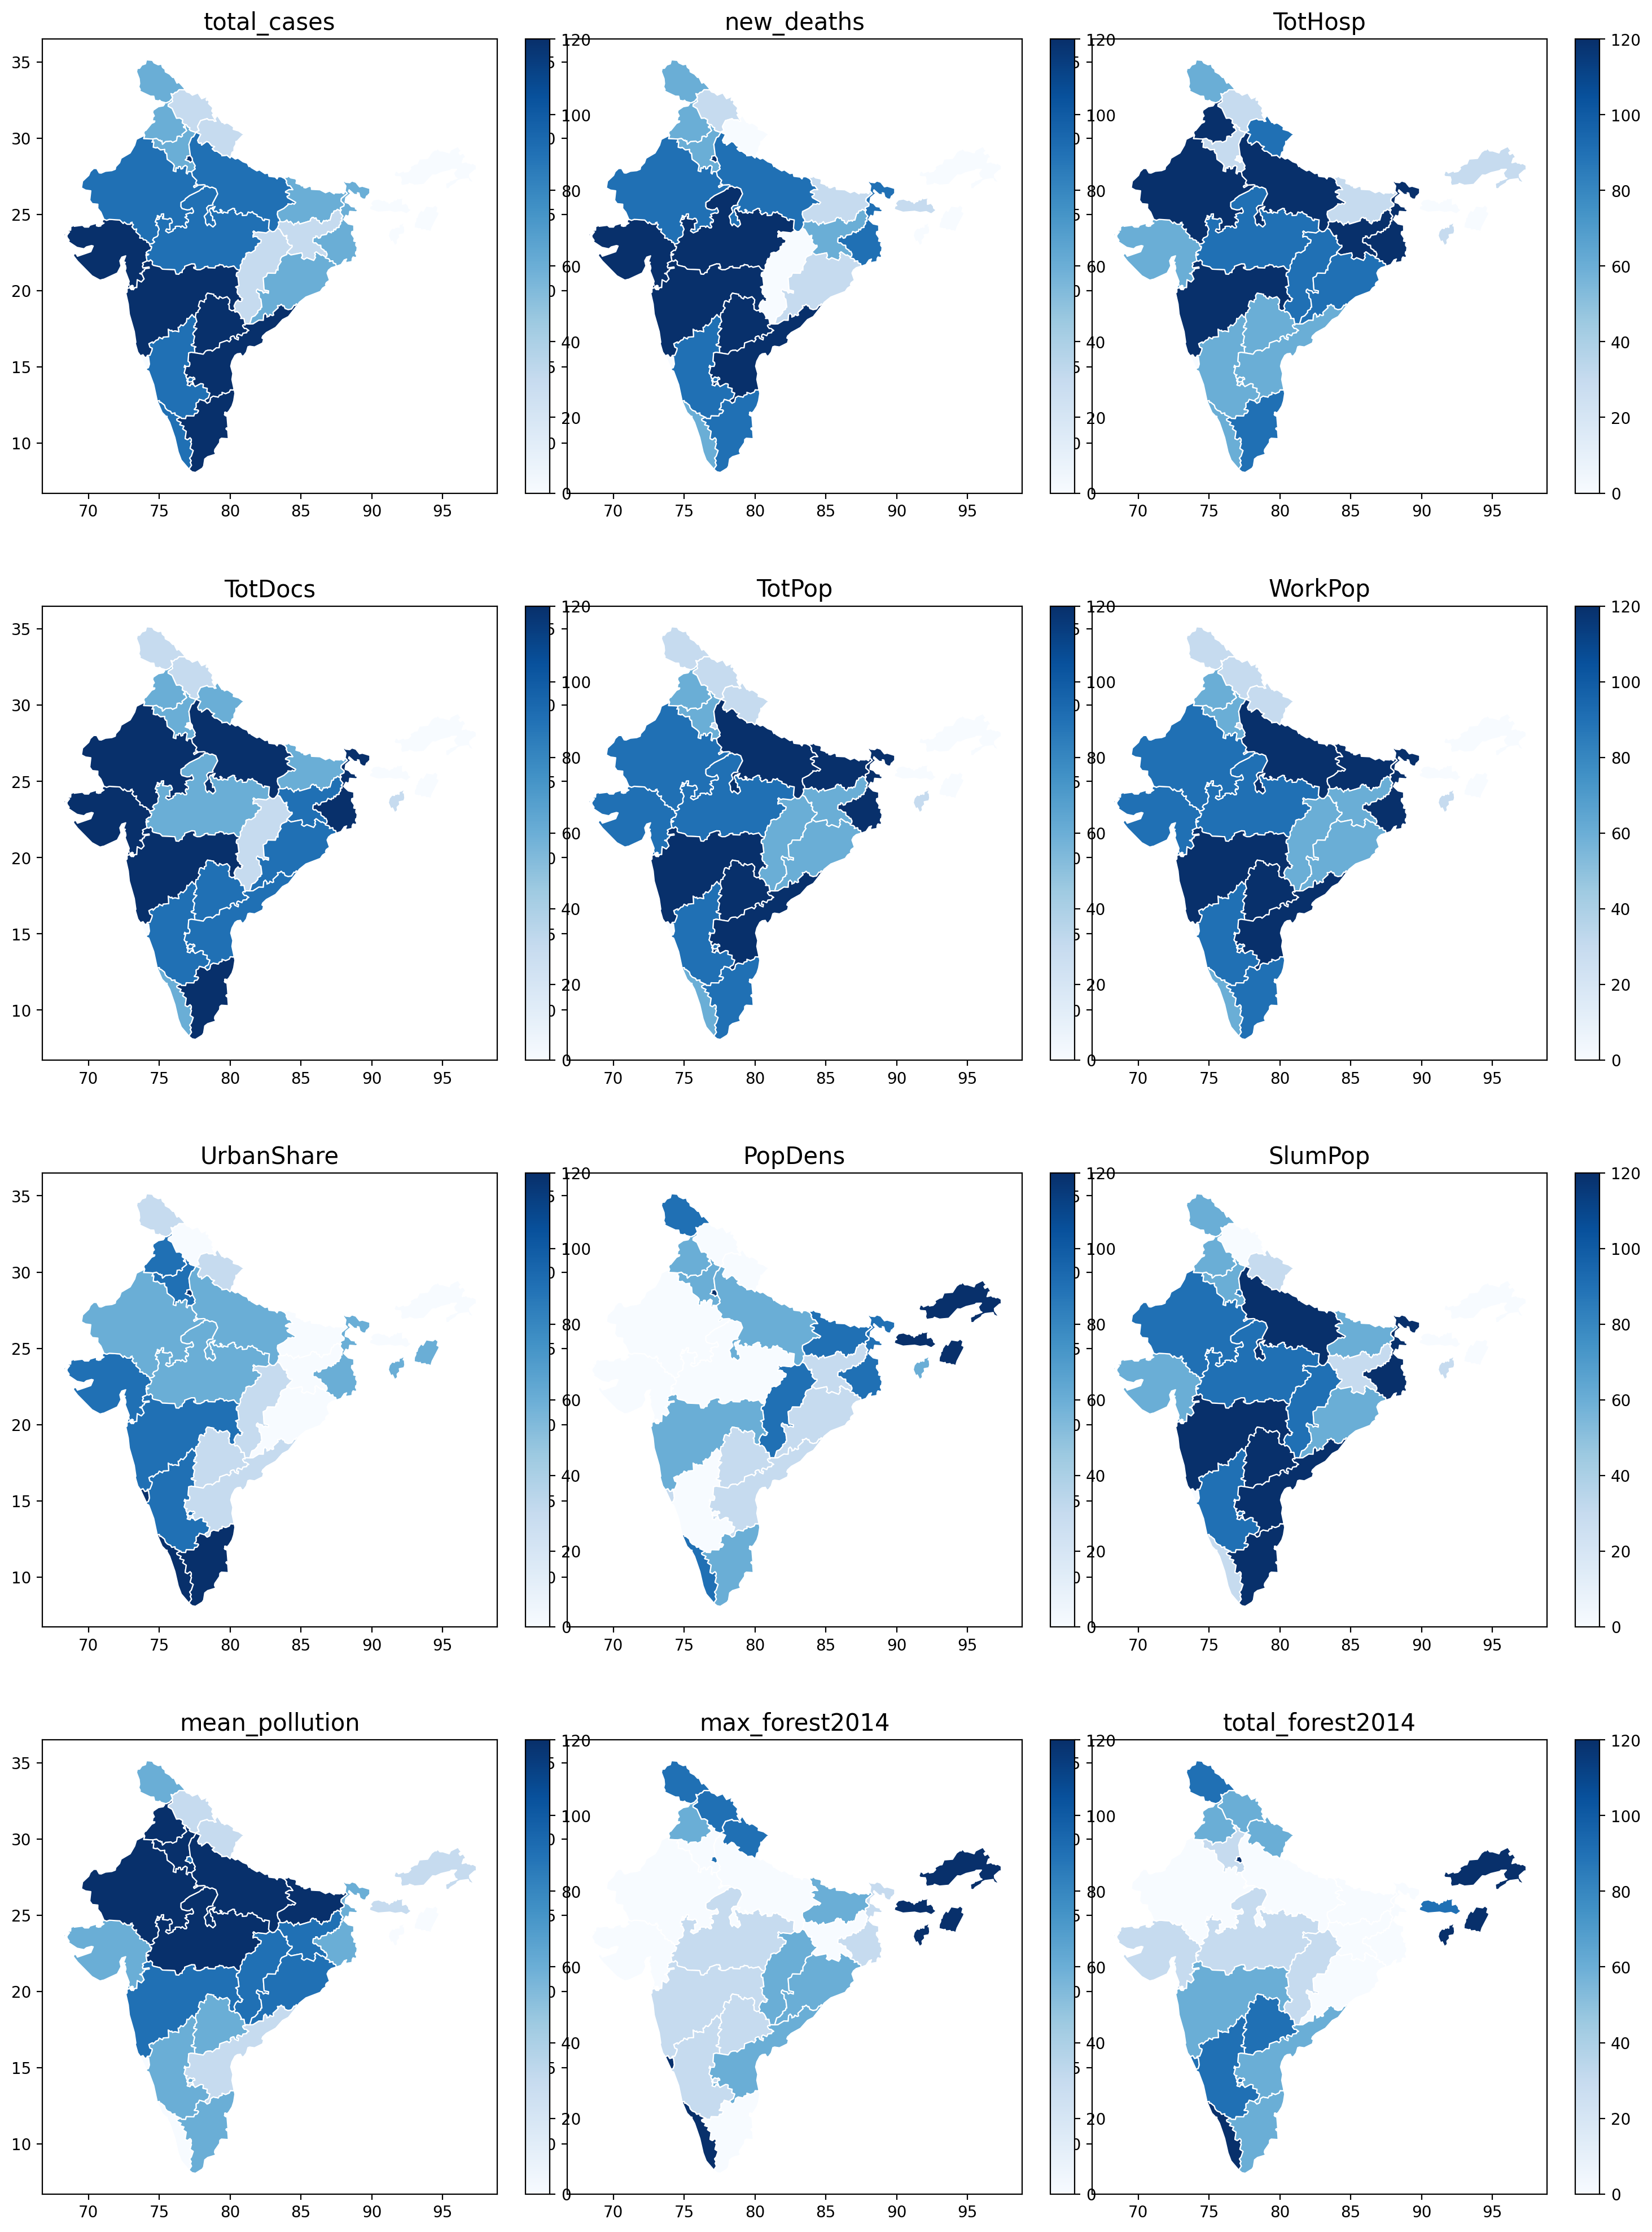

In [31]:
variables = ['total_cases', 'new_deaths', 'TotHosp',
             'TotDocs', 'TotPop', 'WorkPop',
             'UrbanShare', 'PopDens', 'SlumPop',
             'mean_pollution', 'max_forest2014', 'total_forest2014']
vmin, vmax = 0, 120

f, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 25))
plt.subplots_adjust(wspace=0)  # Set the desired spacing between columns

# Make the axes accessible with single indexing
axs = axs.flatten()

for i, col in enumerate(variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map based on Quantiles
    plot = final.plot(column=col, cmap=plt.cm.Blues, linewidth=0.8, ax=ax, edgecolor='w', scheme='Quantiles')
    # Set the axis title to the name of variable being plotted
    ax.set_title(col, fontdict={'fontsize': '15', 'fontweight': '3'})

    # Add a color bar to each subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    norm = Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
    sm.set_array([])  # Set an array for the ScalarMappable
    cbar = plt.colorbar(sm, cax=cax)
    # cbar.set_label("Legend")

plt.show()


In [33]:
variables1 = ['total_cases','new_deaths','TotHosp',
             'TotDocs']
variables2=  ['total_cases','new_deaths',
             'TotPop','WorkPop',
             'UrbanShare','PopDens','SlumPop']
variables3= ['total_cases','new_deaths',
             'mean_pollution','max_forest2014', 'total_forest2014']
variables4= ['UrbanShare',
             'mean_pollution','max_forest2014']
variables5= ['total_cases',
             'mean_pollution','max_forest2014']

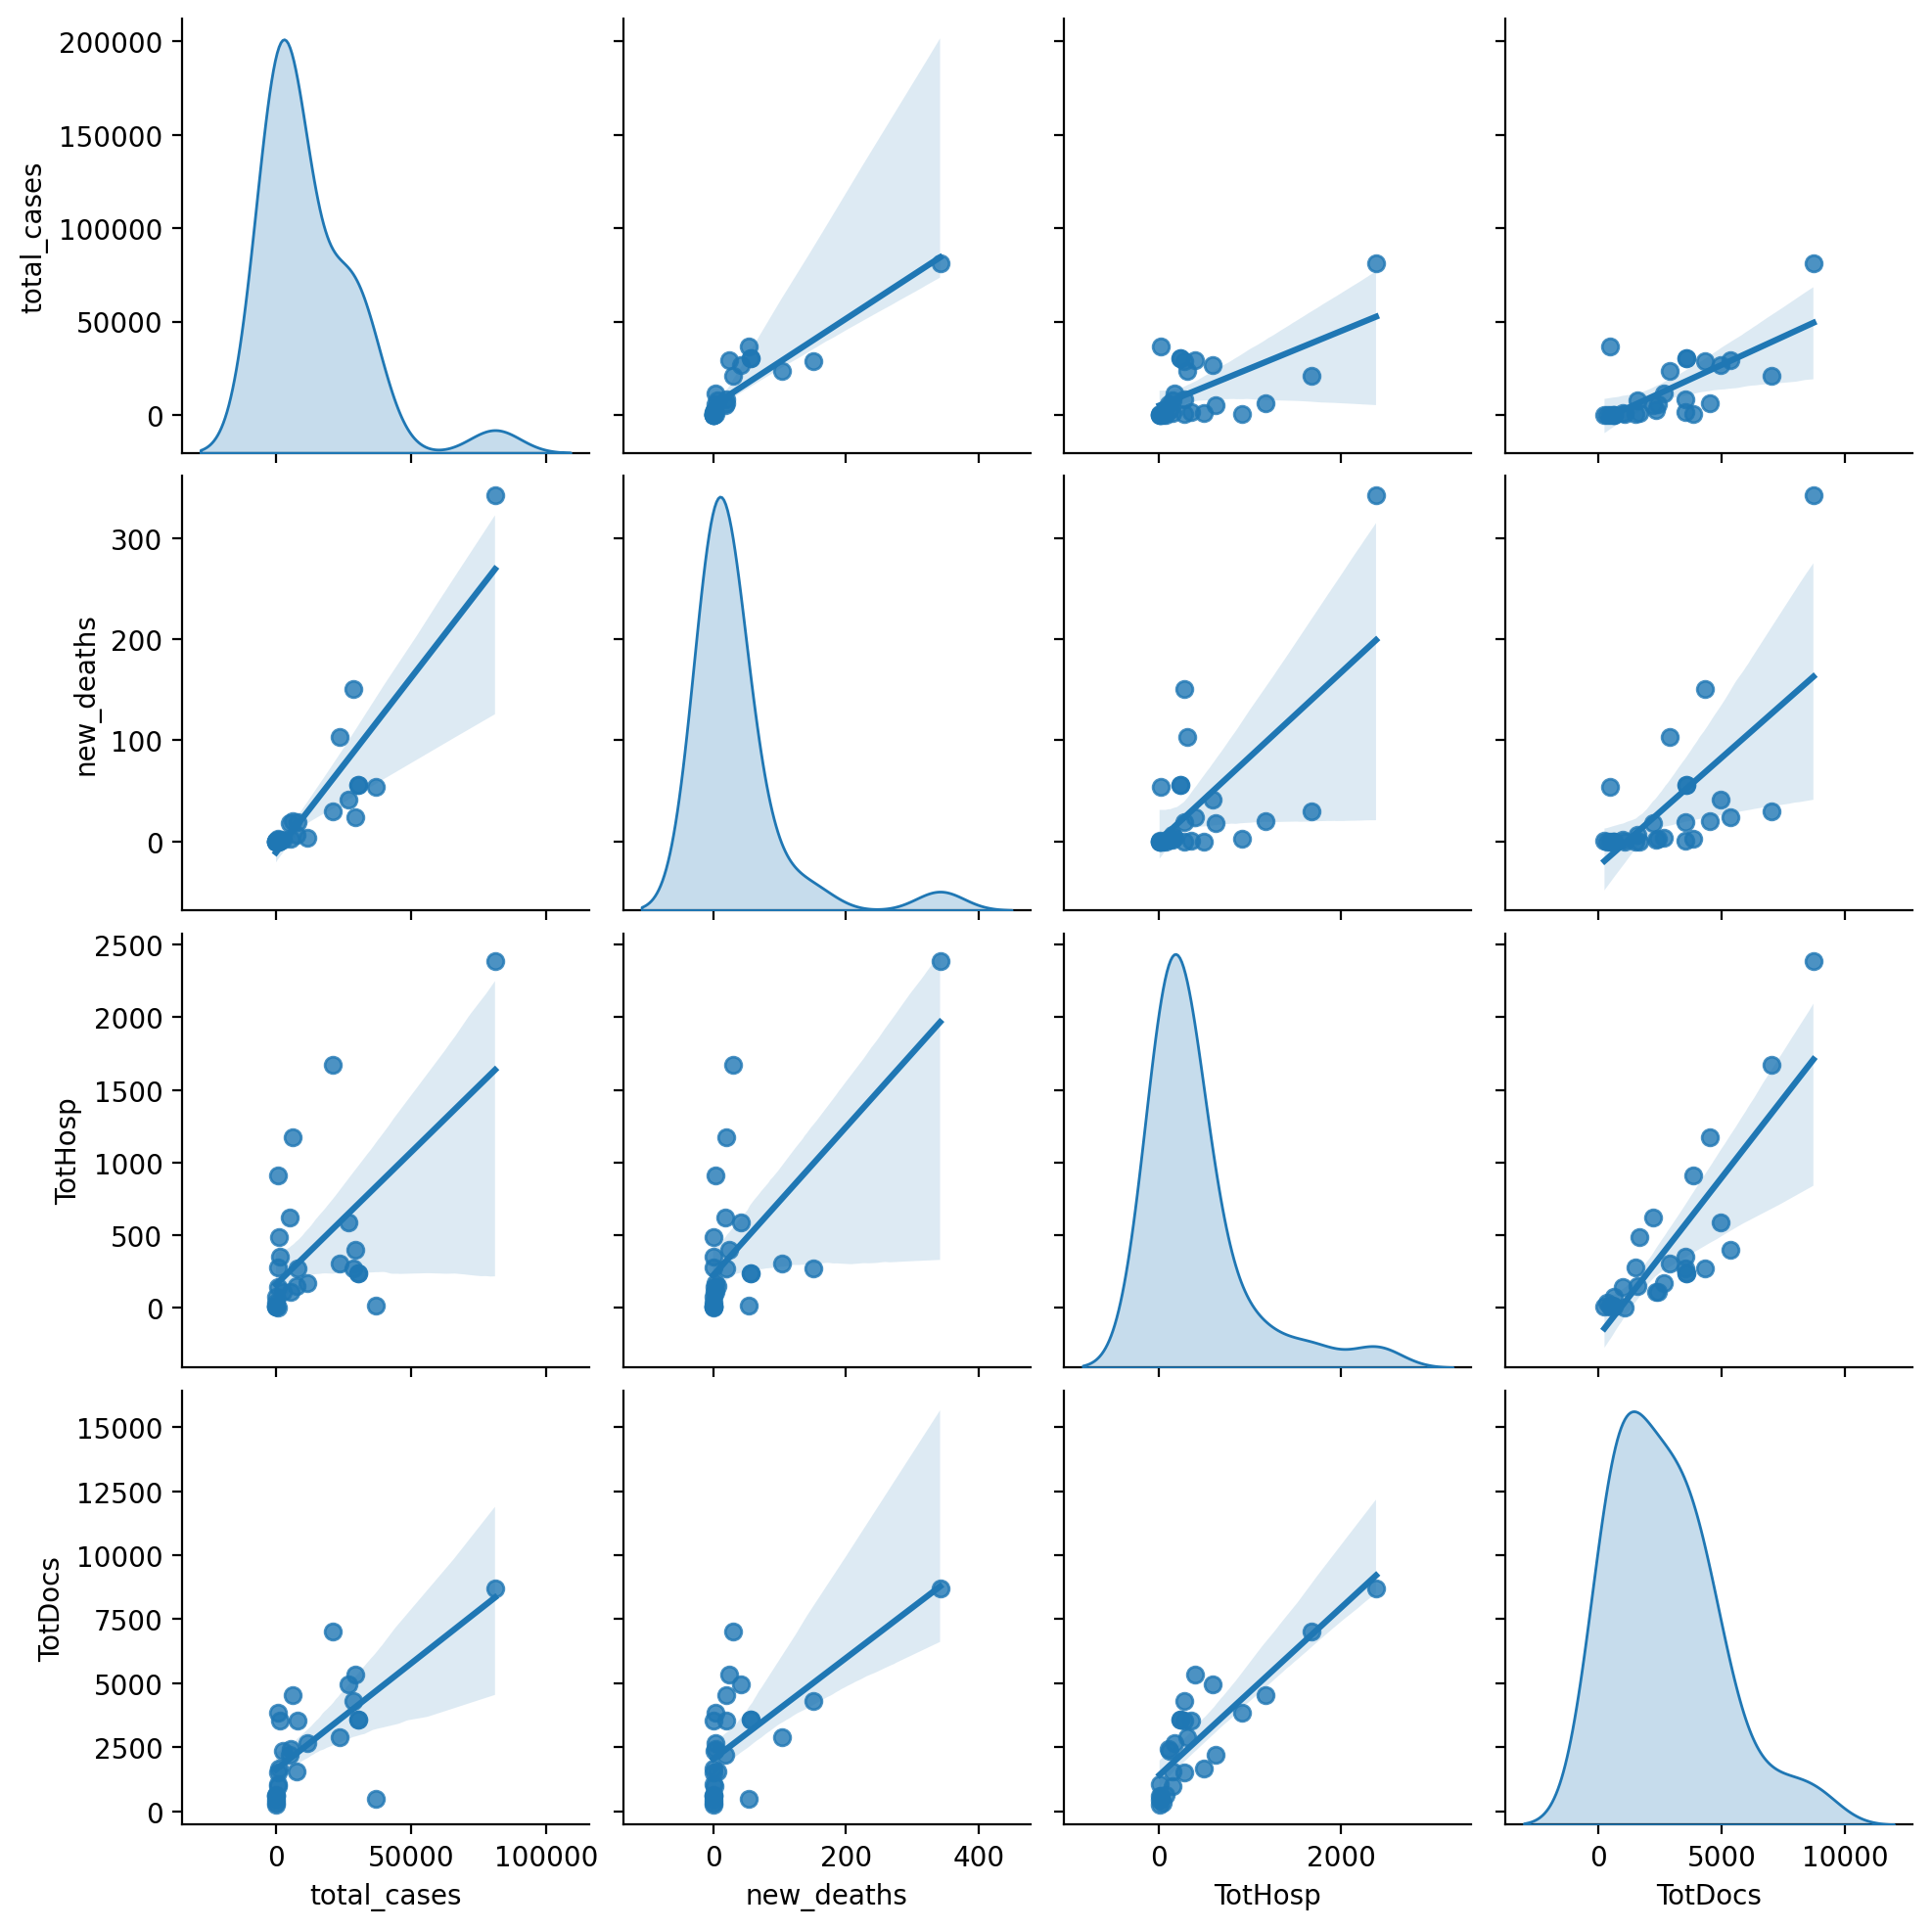

In [34]:
## Create the plot
_ = sns.pairplot(final[variables1], kind='reg', diag_kind='kde')

In [35]:
final.head()

,id,state,geometry,pc11_state_id,TotHosp,TotDocs,UrbanShare,PopDens,SlumPop,TotPop,WorkPop,mean_pollution,num_cells,total_forest2000,max_forest2000,total_forest2001,max_forest2001,total_forest2002,max_forest2002,total_forest2003,max_forest2003,total_forest2004,max_forest2004,total_forest2005,max_forest2005,total_forest2006,max_forest2006,total_forest2007,max_forest2007,total_forest2008,max_forest2008,total_forest2009,max_forest2009,total_forest2010,max_forest2010,total_forest2011,max_forest2011,total_forest2012,max_forest2012,total_forest2013,max_forest2013,total_forest2014,max_forest2014,ec13_state_id,Mean_total_forest_2000_2014,Mean_max_forest_2000_2014,new_deaths,total_cases,Avg
0,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",12,38,347.000000,0.073746,83257.997758,1.556200e+04,1383727.0,587657.0,382.115899,272.215501,16778.069313,74.321991,16542.991178,73.371141,16397.890359,73.487713,16406.702583,75.265911,16582.987398,76.461248,16923.088217,75.594203,16938.015753,74.506616,16387.904852,74.442974,16638.123503,74.141147,17126.782609,75.977316,16897.672968,75.637051,14753.935098,71.389414,17289.192187,75.461878,16473.034657,73.608066,16942.930687,76.386894,12.0,16605.288091,74.670237,0,25,81756.571429
1,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",10,112,2352.642857,0.067551,1237.437277,1.237682e+06,104099452.0,34724987.0,2982.553352,52.958748,300.902894,12.325459,423.699368,16.134861,566.751432,18.754282,391.846070,13.866579,412.751932,14.634465,451.295843,15.577082,492.039636,16.140502,453.205289,15.936389,479.996151,17.987895,336.873042,12.222536,331.719083,11.115939,711.185427,22.205906,419.714882,14.353019,563.210842,18.918408,629.294432,19.212428,10.0,464.299088,15.959050,2,2450,23790.428571
2,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",4,6,1052.000000,0.972532,9258.333000,9.513500e+04,1055450.0,404136.0,71.595327,1893.000000,17986.000000,39.000000,14909.000000,40.000000,20219.000000,34.000000,12246.000000,43.000000,16446.000000,35.000000,20963.000000,32.000000,16831.000000,34.000000,13513.000000,37.000000,22287.000000,37.000000,16774.000000,41.000000,18848.000000,45.000000,18265.000000,41.000000,17413.000000,27.000000,19925.000000,37.000000,18127.000000,35.000000,4.0,17650.133333,37.133333,0,669,188329.000000
3,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",22,277,1509.000000,0.133256,1077.264881,1.898931e+06,25545198.0,12180225.0,1195.304972,101.948326,751.551967,16.163188,868.872951,18.749159,749.276517,15.991245,786.096888,15.436182,1024.122084,20.578071,1045.238456,19.675065,982.639620,19.012011,940.442748,19.743981,564.428976,12.848983,824.538782,18.003790,811.821705,14.939946,794.636844,17.588747,749.702877,14.941600,1063.996050,20.649496,1028.979501,19.573266,22.0,865.756398,17.592982,0,716,60927.714286
4,None,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",30,16,589.000000,0.521562,552.891793,2.624700e+04,1458545.0,577248.0,50.579904,170.544271,3856.984375,42.065104,4783.716146,49.570312,4152.747396,41.059896,3920.833333,42.692708,4397.890625,44.398438,3521.908854,35.710938,4930.419271,48.062500,3639.588542,37.197917,4138.179688,41.562500,4106.539062,43.372396,5415.304688,50.843750,4592.119792,46.000000,3791.156250,40.924479,4151.070312,42.953125,4806.403646,45.815104,30.0,4280.324132,43.481944,0,204,259238.142857


## Regression

In [36]:
train_data, test_data = train_test_split(final, test_size=0.2, random_state=300000000)

In [53]:
# Create function for the regression which helps to create the polynomial graph as the comparison
def plot_average_age(cur_model, label_y_axis, poly_transformer=None):
    
    # build the x values for the prediction line
    x_vals = np.arange(0, 90000, 0.1).reshape(-1, 1)
    
    # optionally use the passed-in transformer
    if poly_transformer is not None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = cur_model.predict(dm)
    
    # plot the prediction line, and the test data
    plt.plot(x_vals, prediction, color='k', label="Prediction")
    plt.scatter(X_test, y_test, label="Test Data")
    
    # create the title
    plt.title(f"Linear Regression: {label_y_axis} vs. Total Cases", fontdict={'fontsize': '15', 'fontweight': '3'})
    
    # label your plots
    plt.xlabel("Total Cases")
    plt.ylabel(label_y_axis)

    plt.legend()
    plt.show()


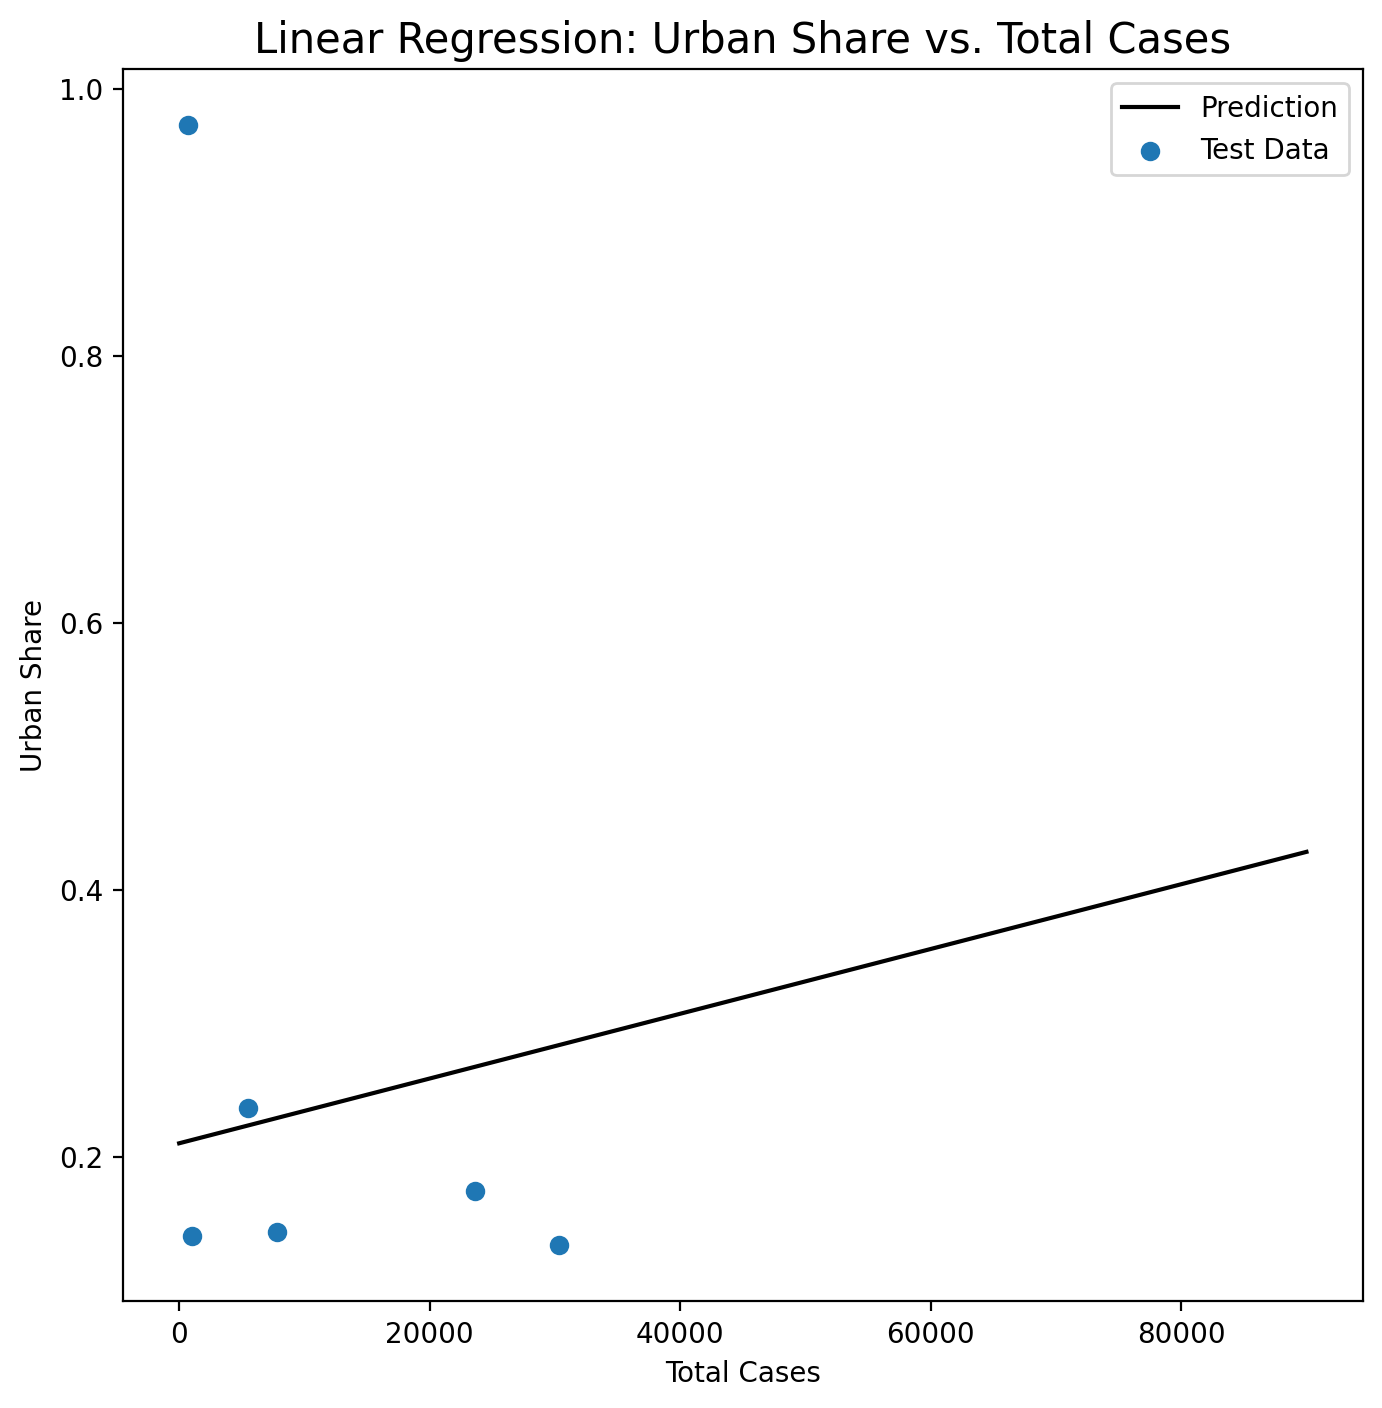

In [54]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['UrbanShare'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['UrbanShare'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Urban Share")

In [55]:
## The coefficients
print('Coefficients (UrbanShare & Total Death): \n', regr.coef_)
# The mean squared error for 
print('Mean squared error (UrbanShare & Total Death): %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (UrbanShare & Total Death): %.2f'
      % r2_score(y_test, y_pred))

Coefficients (UrbanShare & Total Death): 
 [2.42537161e-06]
Mean squared error (UrbanShare & Total Death): 0.10
Coefficient of determination (UrbanShare & Total Death): -0.13


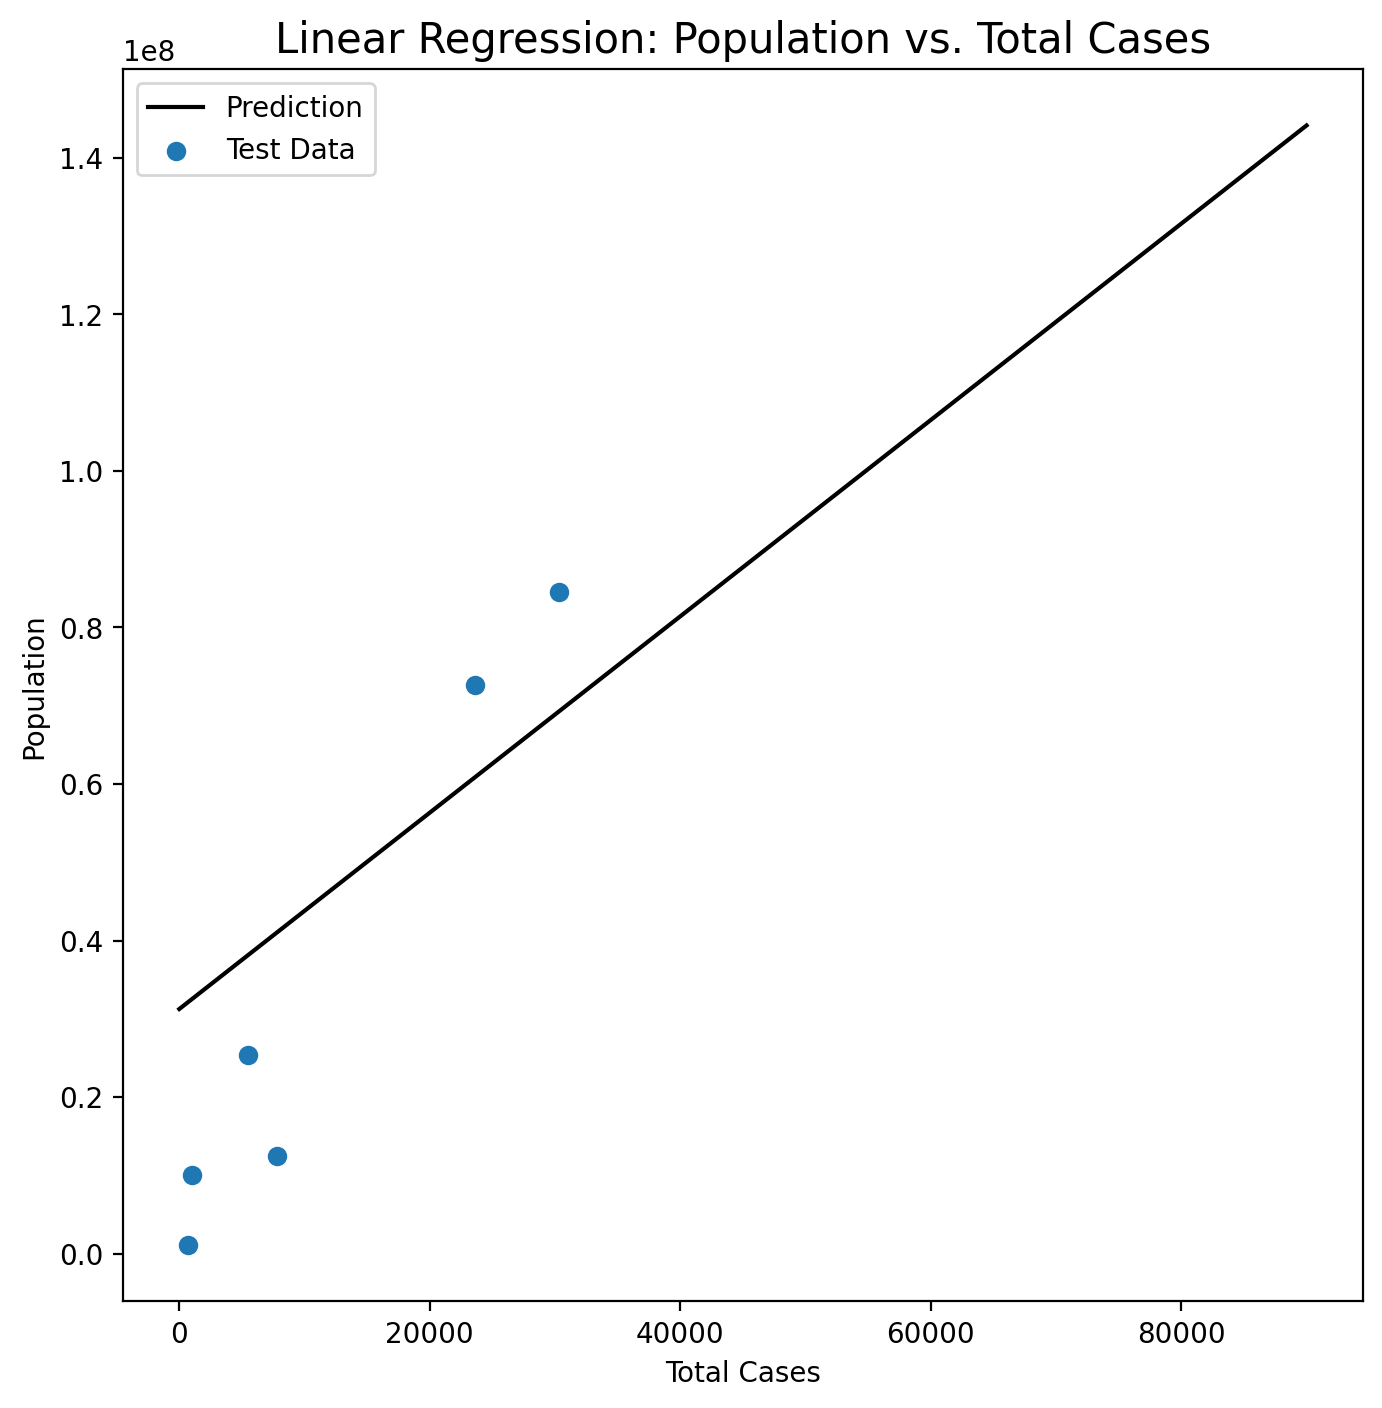

In [56]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['TotPop'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['TotPop'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Population")

In [57]:
## The coefficients
print('Coefficients (TotPop & Total Death): \n', regr.coef_)
# The mean squared error for 
print('Mean squared error (TotPop & Total Death): %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (TotPop & Total Death): %.2f'
      % r2_score(y_test, y_pred))

Coefficients (TotPop & Total Death): 
 [1254.06771843]
Mean squared error (TotPop & Total Death): 468726305184005.44
Coefficient of determination (TotPop & Total Death): 0.55


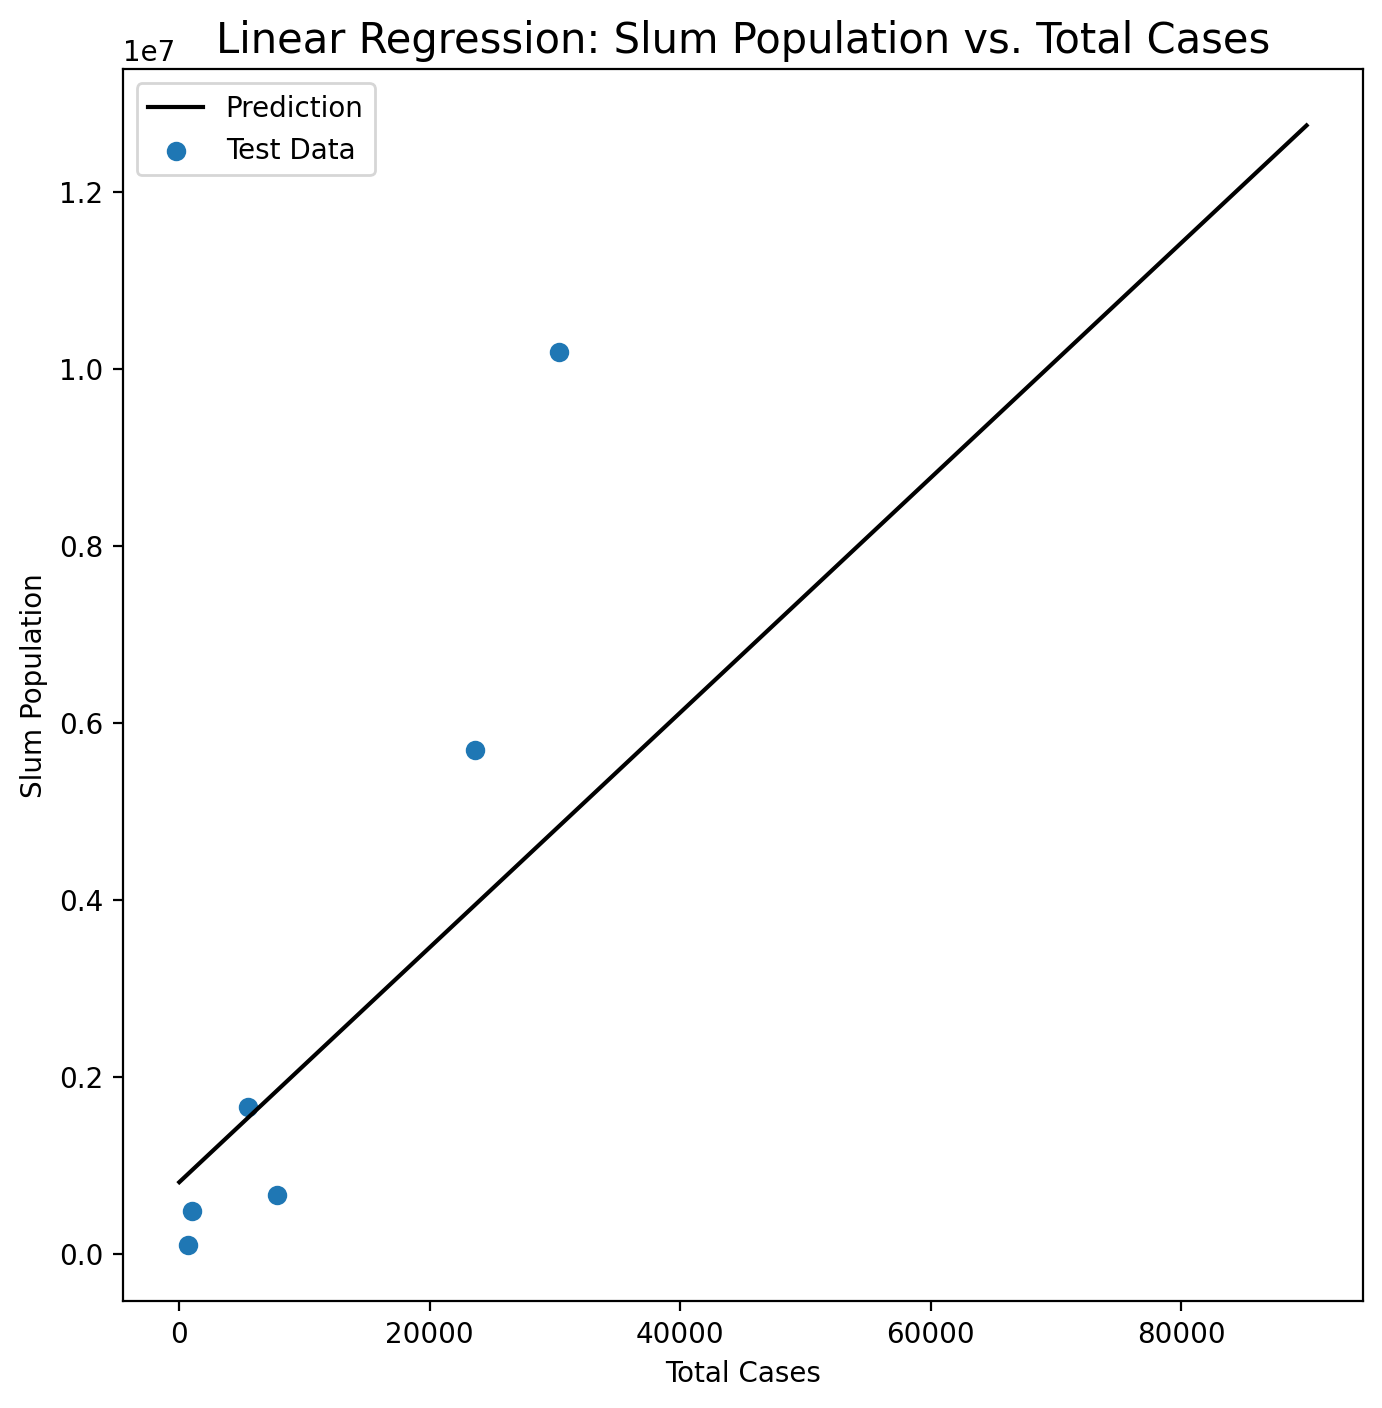

In [58]:
 # CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['SlumPop'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['SlumPop'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Slum Population")

In [59]:
## The coefficients
print('Coefficients (Slum Pop): \n', regr.coef_)
# The mean squared error for 
print('Mean squared error (Slum Pop): %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (Slum Pop): %.2f'
      % r2_score(y_test, y_pred))

Coefficients (Slum Pop): 
 [132.65138959]
Mean squared error (Slum Pop): 5662383360642.69
Coefficient of determination (Slum Pop): 0.58


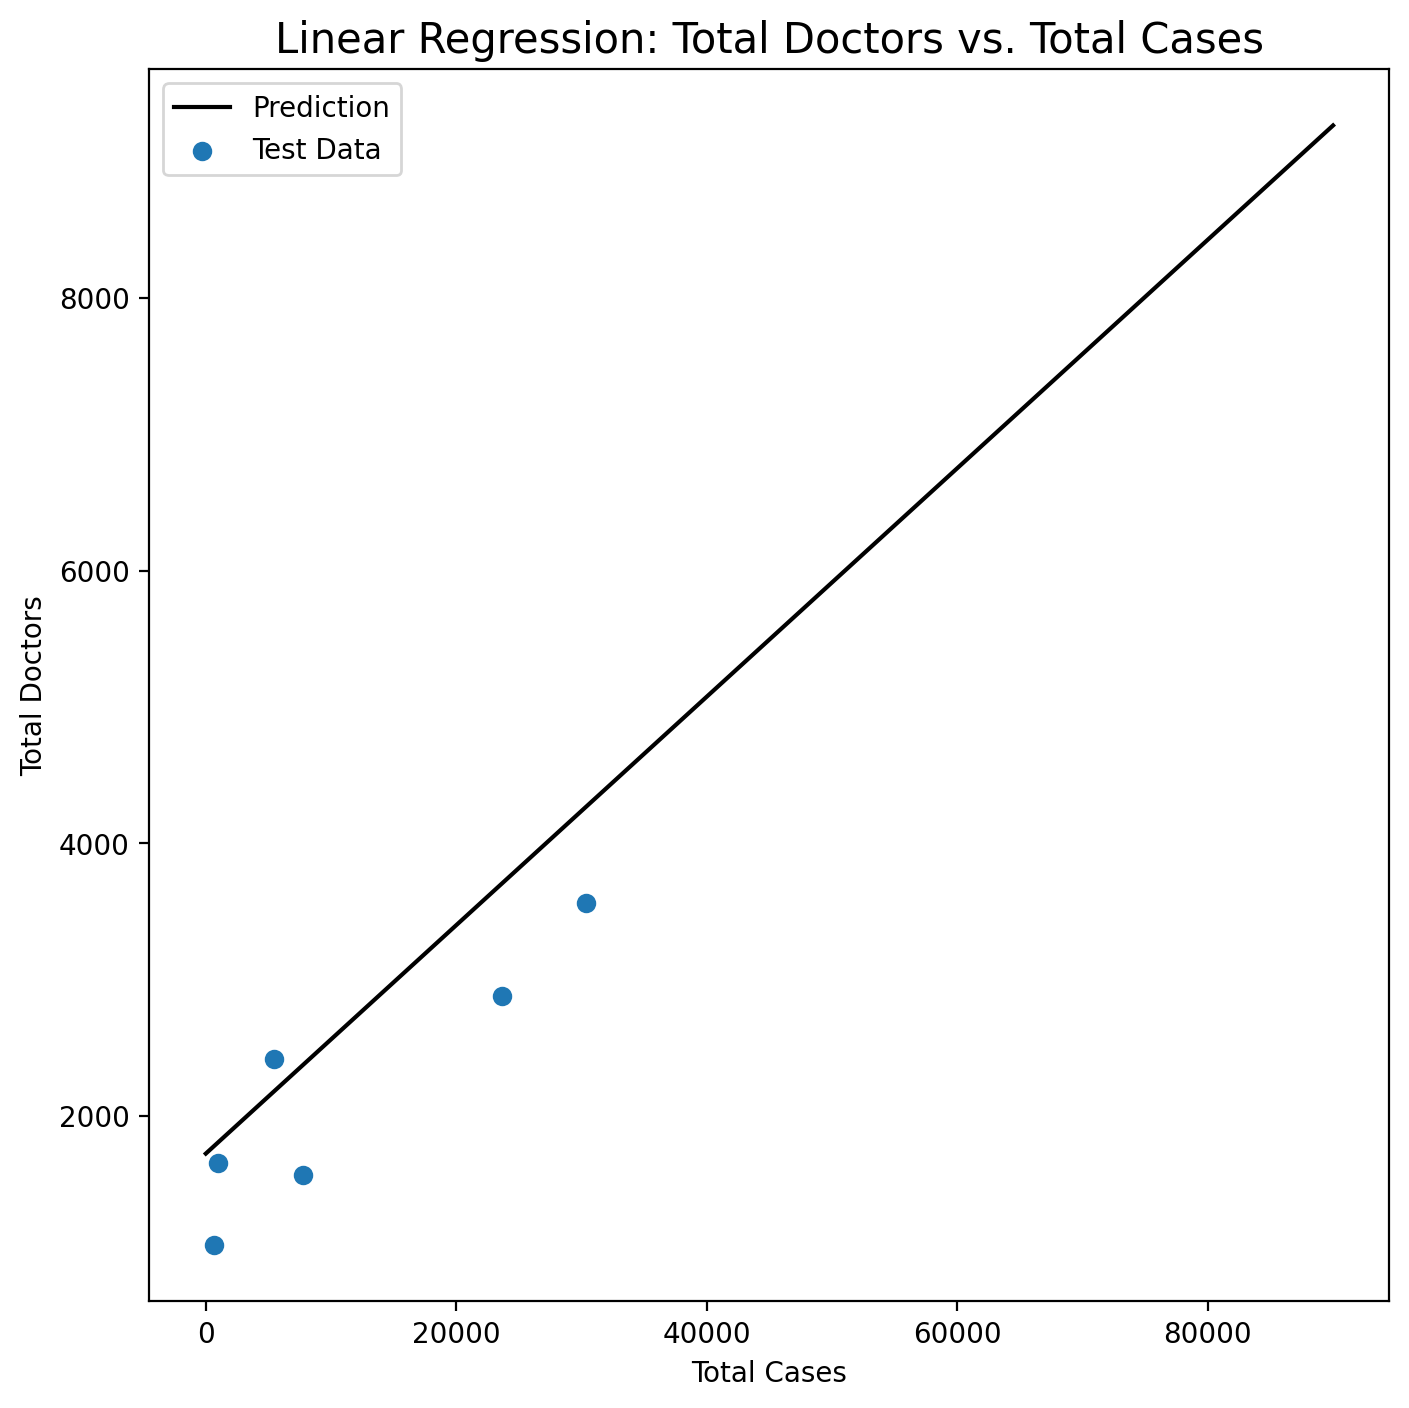

In [60]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['TotDocs'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['TotDocs'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Total Doctors")

In [61]:
## The coefficients
print('Coefficients (TotDoc): \n', regr.coef_)
# The mean squared error for 
print('Mean squared error (TotDoc): %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (TotDoc): %.2f'
      % r2_score(y_test, y_pred))

Coefficients (TotDoc): 
 [0.08377547]
Mean squared error (TotDoc): 406449.11
Coefficient of determination (TotDoc): 0.44


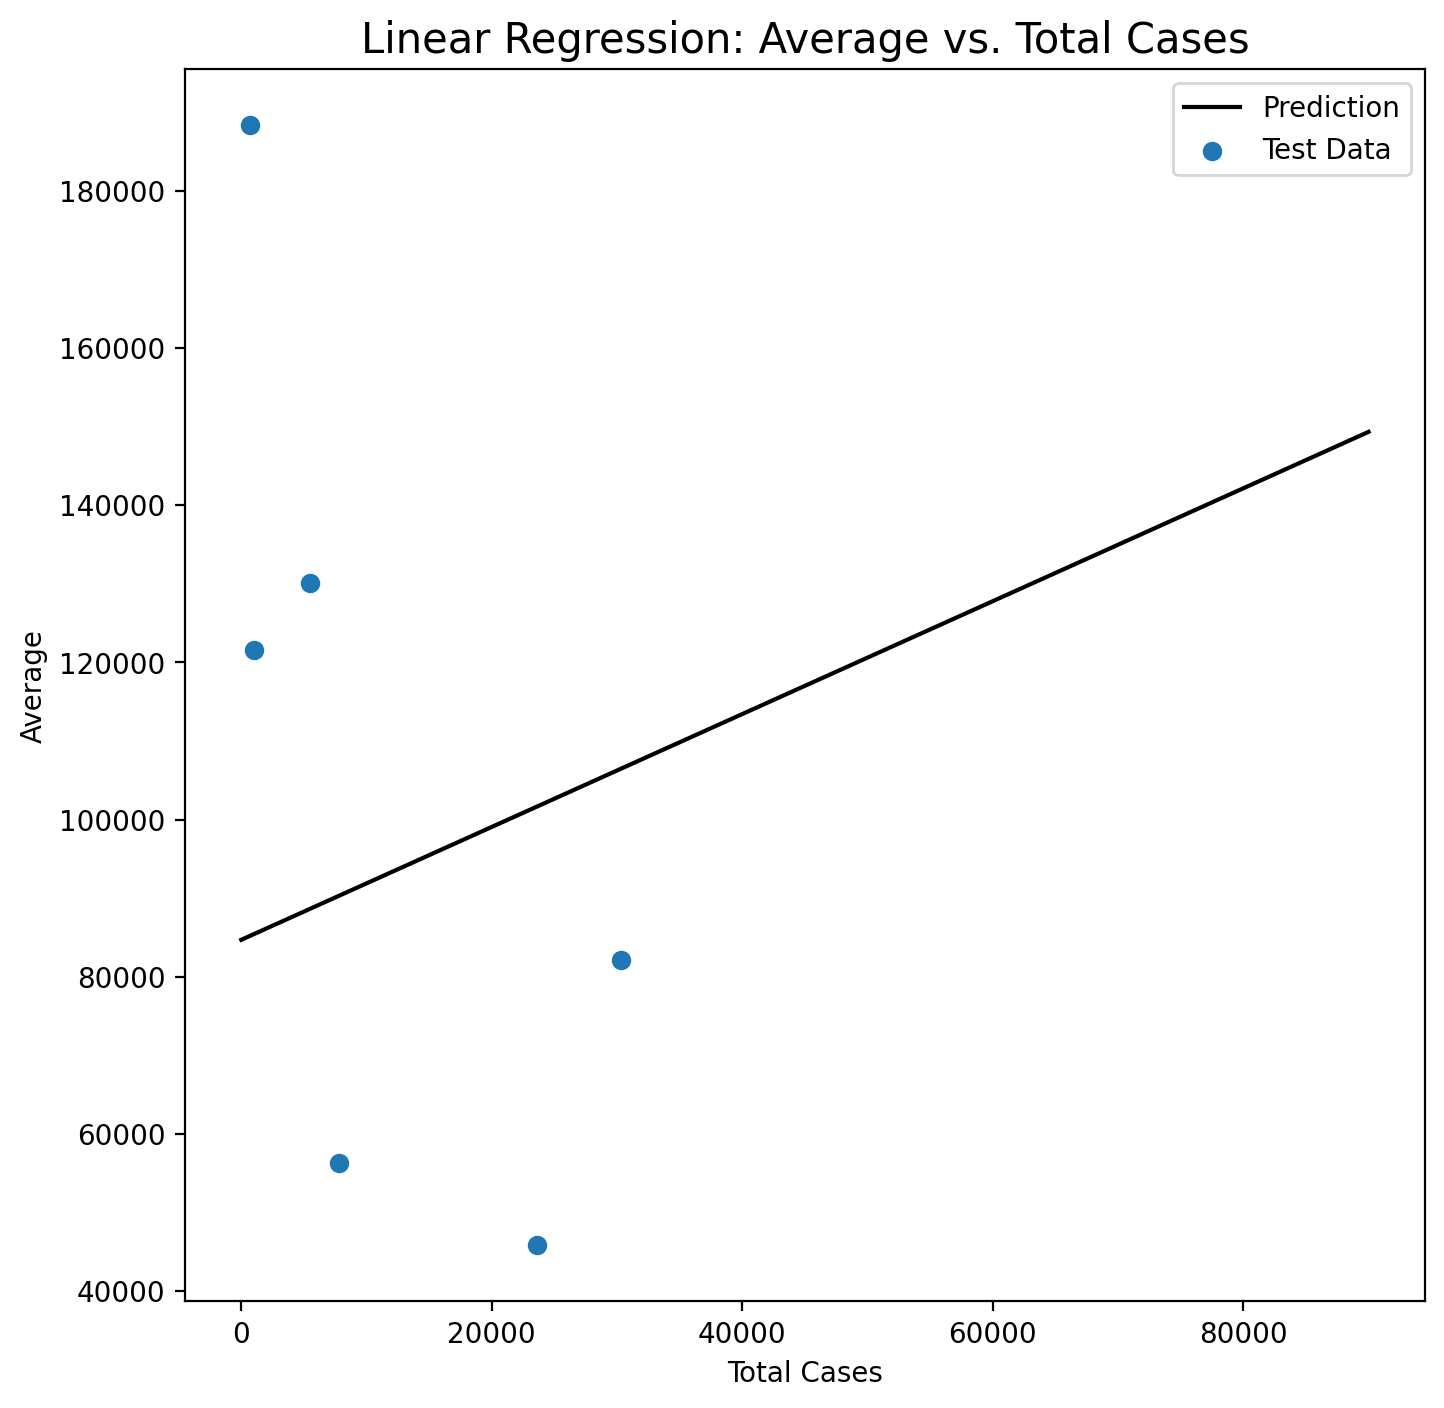

In [62]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['Avg'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['Avg'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Average")

In [63]:
## The coefficients
print('Coefficients Avg: \n', regr.coef_)
# The mean squared error for 
print('Mean squared error Avg: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination Avg: %.2f'
      % r2_score(y_test, y_pred))

Coefficients Avg: 
 [0.71821517]
Mean squared error Avg: 3088727401.70
Coefficient of determination Avg: -0.30


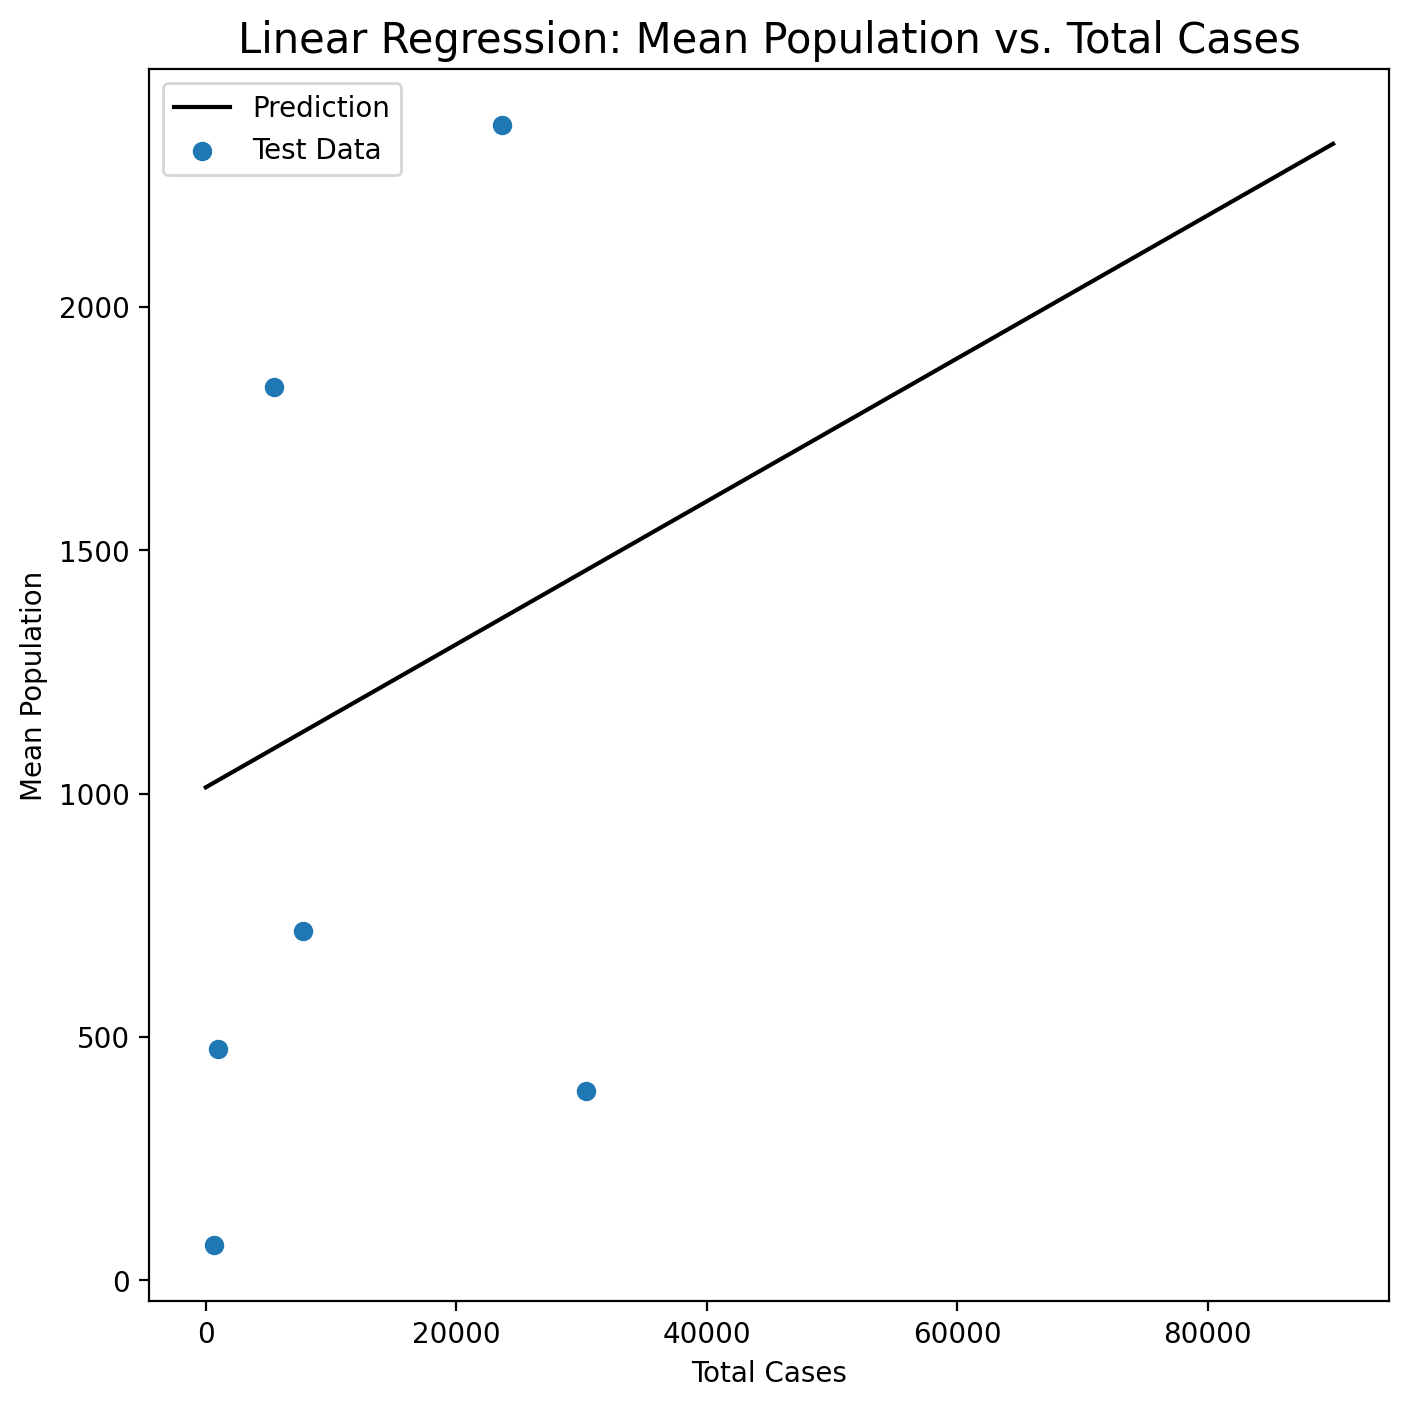

In [65]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['mean_pollution'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['mean_pollution'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Mean Population")

In [66]:
## The coefficients
print('Coefficients mean pollution: \n', regr.coef_)
# The mean squared error for 
print('Mean squared error mean pollution: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination mean pollution: %.2f'
      % r2_score(y_test, y_pred))

Coefficients mean pollution: 
 [0.0146939]
Mean squared error mean pollution: 683414.69
Coefficient of determination mean pollution: 0.02


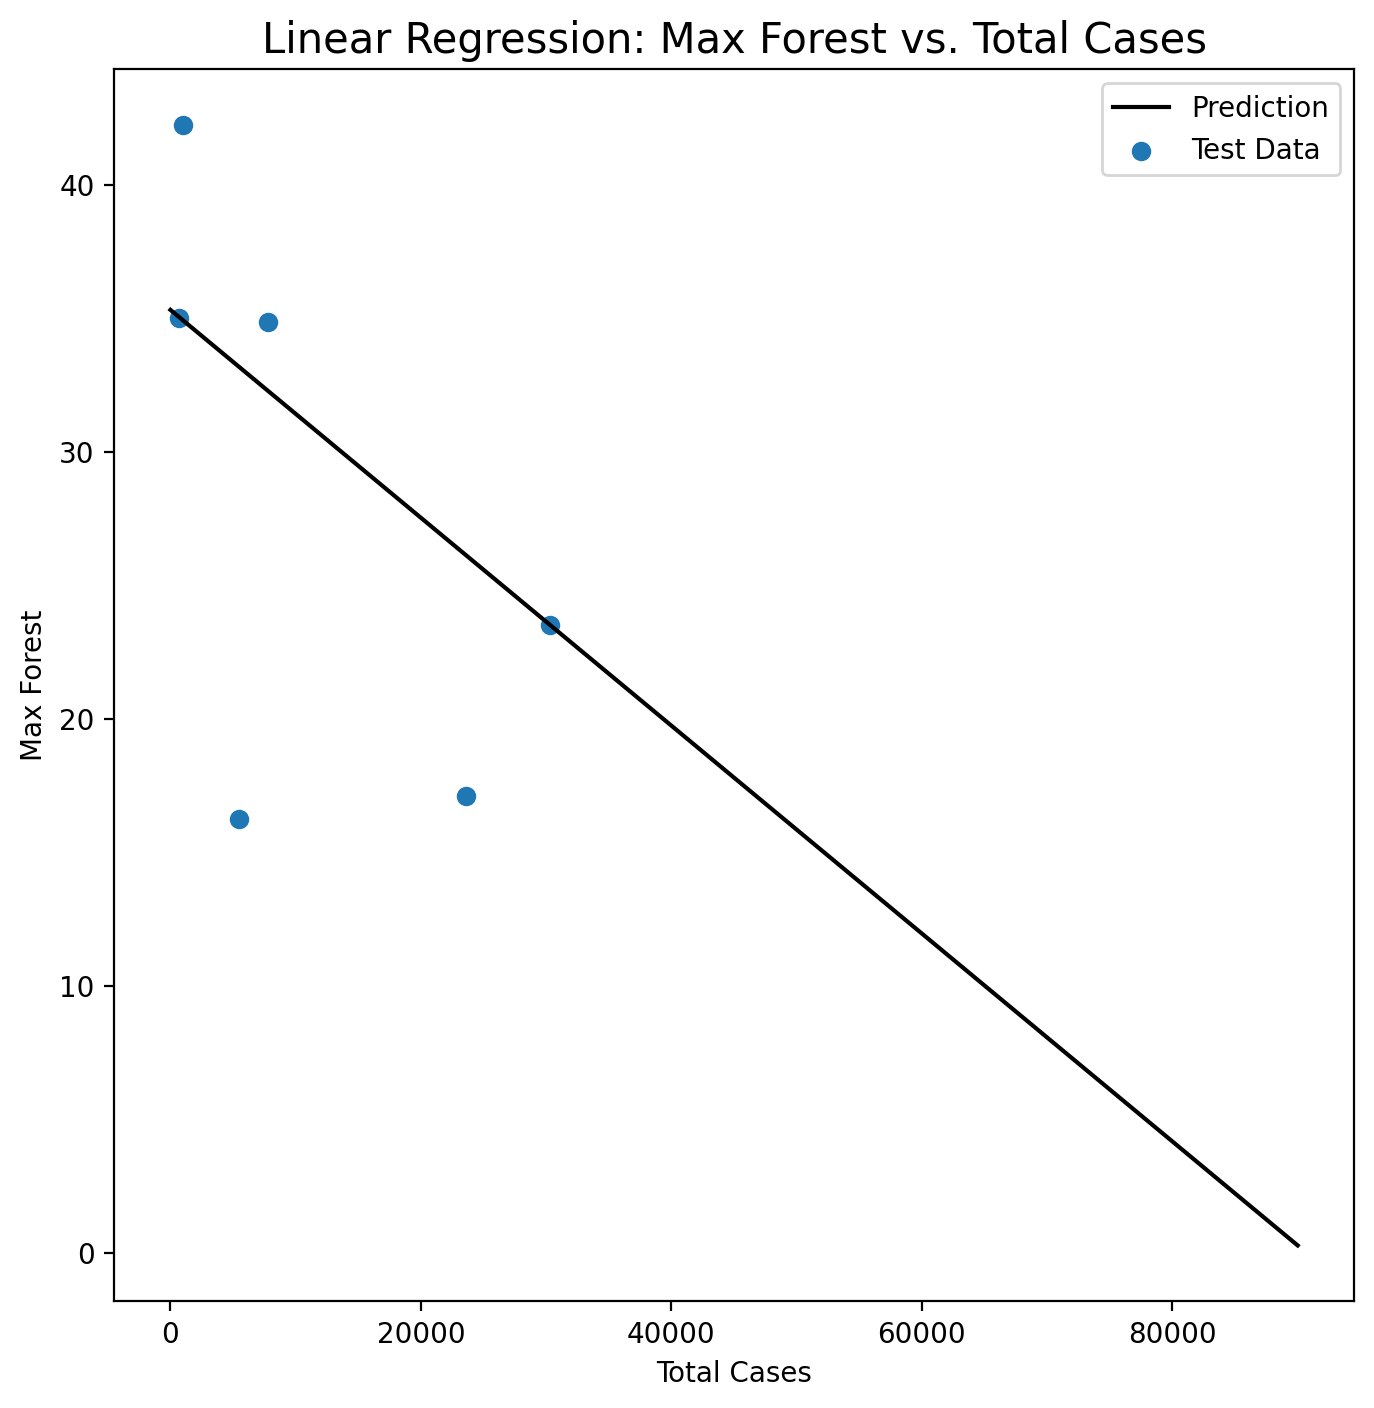

In [67]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['max_forest2014'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['max_forest2014'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Max Forest")

In [68]:
## The coefficients
print('Coefficients max forest: \n', regr.coef_)
# The mean squared error for 
print('Mean squared error max forest: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination max forest: %.2f'
      % r2_score(y_test, y_pred))

Coefficients max forest: 
 [-0.00038918]
Mean squared error max forest: 71.17
Coefficient of determination max forest: 0.26


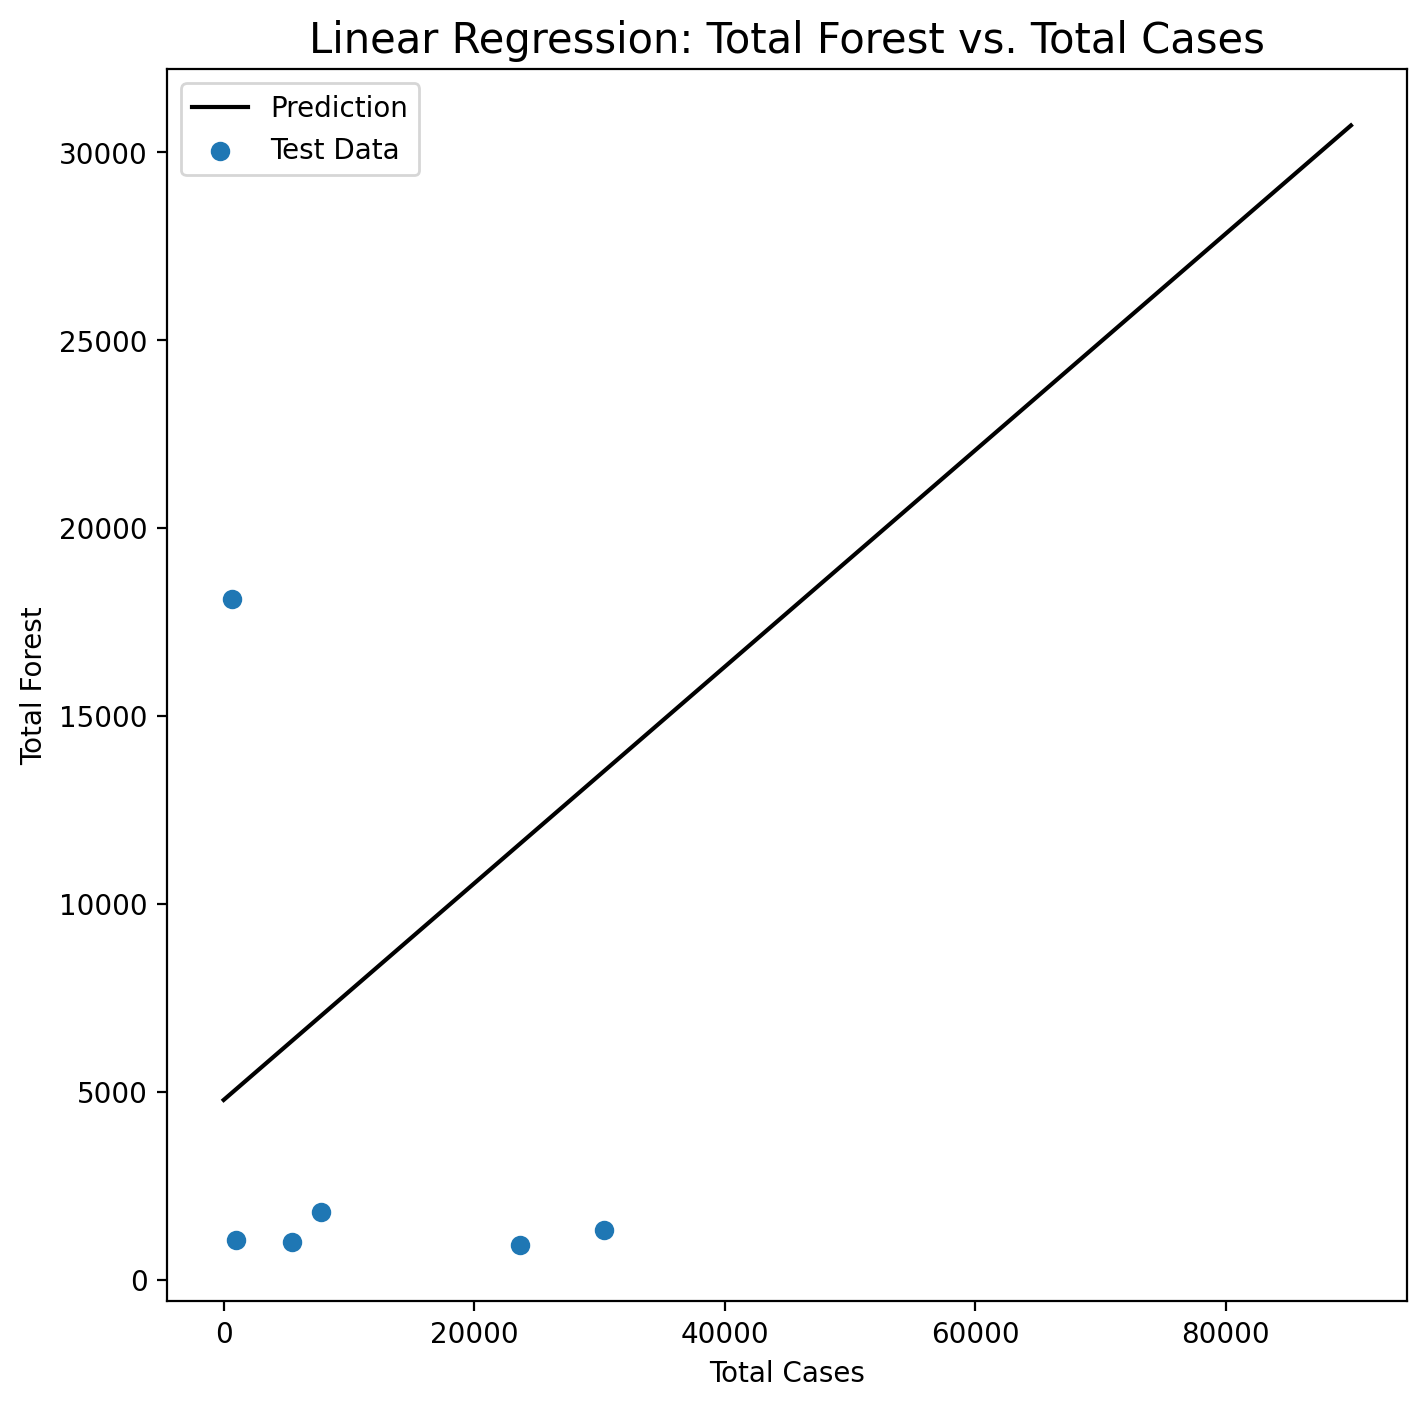

In [69]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['total_forest2014'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['total_forest2014'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Total Forest")

In [70]:
## The coefficients
print('Coefficients total forest: \n', regr.coef_)
# The mean squared error for 
print('Mean squared error total forest: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination total forest: %.2f'
      % r2_score(y_test, y_pred))

Coefficients total forest: 
 [0.28814691]
Mean squared error total forest: 84731912.09
Coefficient of determination total forest: -1.13


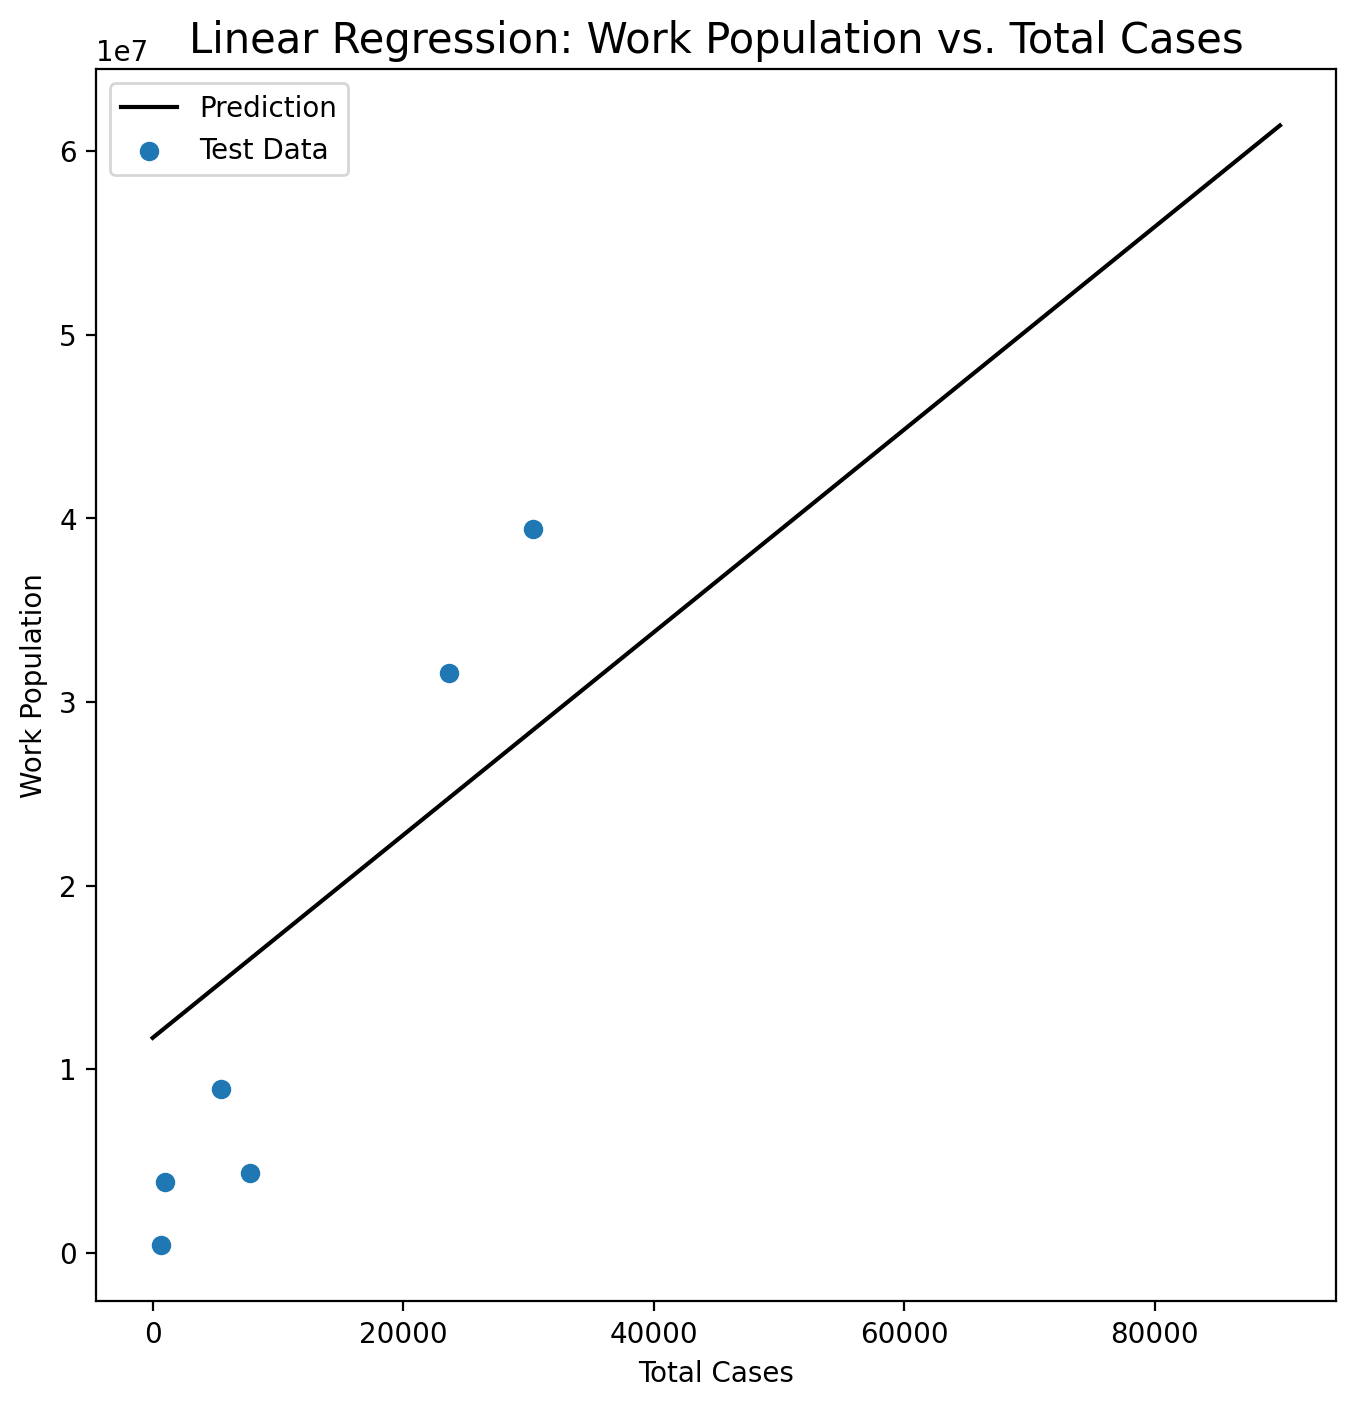

In [71]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['WorkPop'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['WorkPop'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Work Population")

In [72]:
## The coefficients
print('Coefficients WorkPop: \n', regr.coef_)
# The mean squared error for 
print('Mean squared error WorkPop: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination WorkPop: %.2f'
      % r2_score(y_test, y_pred))

Coefficients WorkPop: 
 [552.12937984]
Mean squared error WorkPop: 90662357983218.50
Coefficient of determination WorkPop: 0.60


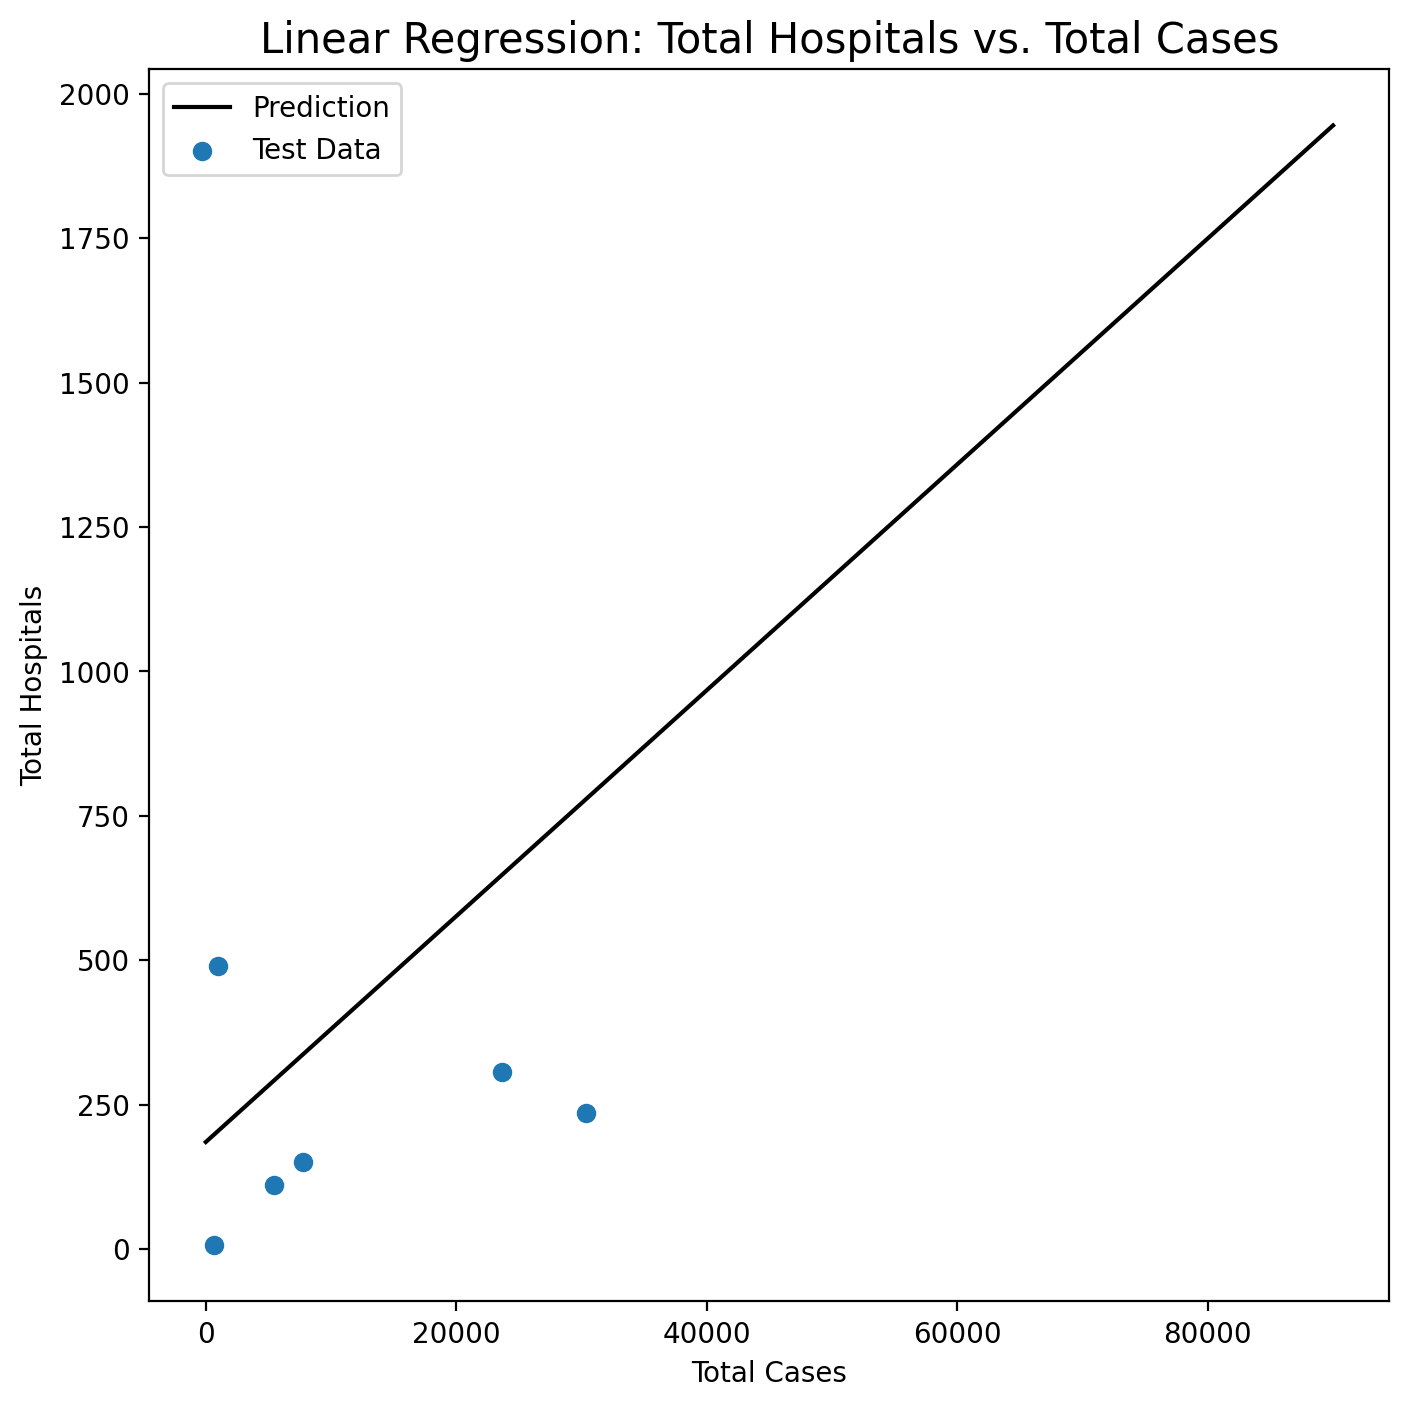

In [73]:
# CREATE REGRESSION
f, ax = plt.subplots(figsize=(8, 8))
#set the train data from 2018
#-1 is automatically determined by inferring from the specified values of other dimensions.
X_train = train_data['total_cases'].values.reshape(-1, 1) 
y_train = train_data['TotHosp'].values
#set the test data from 2019
X_test = test_data['total_cases'].values.reshape(-1, 1)
y_test = test_data['TotHosp'].values

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# call the function and show the regression graph
fitted_Av_Age = LinearRegression().fit(X_train, y_train)
plot_average_age(fitted_Av_Age, "Total Hospitals")

In [74]:
## The coefficients
print('Coefficients TotHosp: \n', regr.coef_)
# The mean squared error for 
print('Mean squared error TotHosp: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination TotHosp: %.2f'
      % r2_score(y_test, y_pred))

Coefficients TotHosp: 
 [0.01955788]
Mean squared error TotHosp: 99455.82
Coefficient of determination TotHosp: -3.17


Some relation with pollution, no relation with forest. 
Possible relation: slumpop, work pop

### To summarize:
**Possible relation with covid deaths (consider linear):**

* TotPop
    * Coefficients (TotPop & Total Death): [1254.06771843]
    * Mean squared error (TotPop & Total Death): 468726305184005.44
    * Coefficient of determination (TotPop & Total Death): 0.55

* SlumPop
    * Coefficients (Slum Pop): [132.65138959]
    * Mean squared error (Slum Pop): 5662383360642.69
    * Coefficient of determination (Slum Pop): 0.58

* TotDoc
    * Coefficients (TotDoc): [0.08377547]
    * Mean squared error (TotDoc): 406449.11
    * Coefficient of determination (TotDoc): 0.44

* Max Forest
    * Coefficients max forest: [-0.00038918]
    * Mean squared error max forest: 71.17
    * Coefficient of determination max forest: 0.26

* Mean pollution
    * Coefficients mean pollution: [0.0146939]
    * Mean squared error mean pollution: 683414.69
    * Coefficient of determination mean pollution: 0.02

* Workpop (positive)
    * Coefficients WorkPop: [552.12937984]
    * Mean squared error WorkPop: 90662357983218.55
    * Coefficient of determination WorkPop: 0.60
<br><br>

**No relation covid deaths (consider clustering):**
* Urban Share
    * Coefficients (UrbanShare & Total Death):  [2.42537161e-06]
    * Mean squared error (UrbanShare & Total Death): 0.10
    * Coefficient of determination (UrbanShare & Total Death): -0.13
* TotHosp
    * Coefficients TotHosp: [0.01955788]
    * Mean squared error TotHosp: 99455.82
    * Coefficient of determination TotHosp: -3.17
* Total Forest
    * Coefficients total forest: [0.28814691]
    * Mean squared error total forest: 84731912.09
    * Coefficient of determination total forest: -1.13
* Avg
    * Coefficients Avg: [0.71821517]
    * Mean squared error Avg: 3088727401.70
    * Coefficient of determination Avg: -0.30



## Clustering

In [76]:
# Create 5 clusters by using kmeans 
kmeans5 = cluster.KMeans(n_clusters=3)

In [77]:
# call random seed 100
np.random.seed(10000)
#create new definition of variables which is relevant
variables7 = ['total_cases','mean_pollution','SlumPop','max_forest2014','WorkPop']
# Run the clustering algorithm
k5cls = kmeans5.fit(final[variables7])

In [78]:
k5cls.labels_

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 0, 1])

In [79]:
#create the cluster
final['k5cls'] = k5cls.labels_

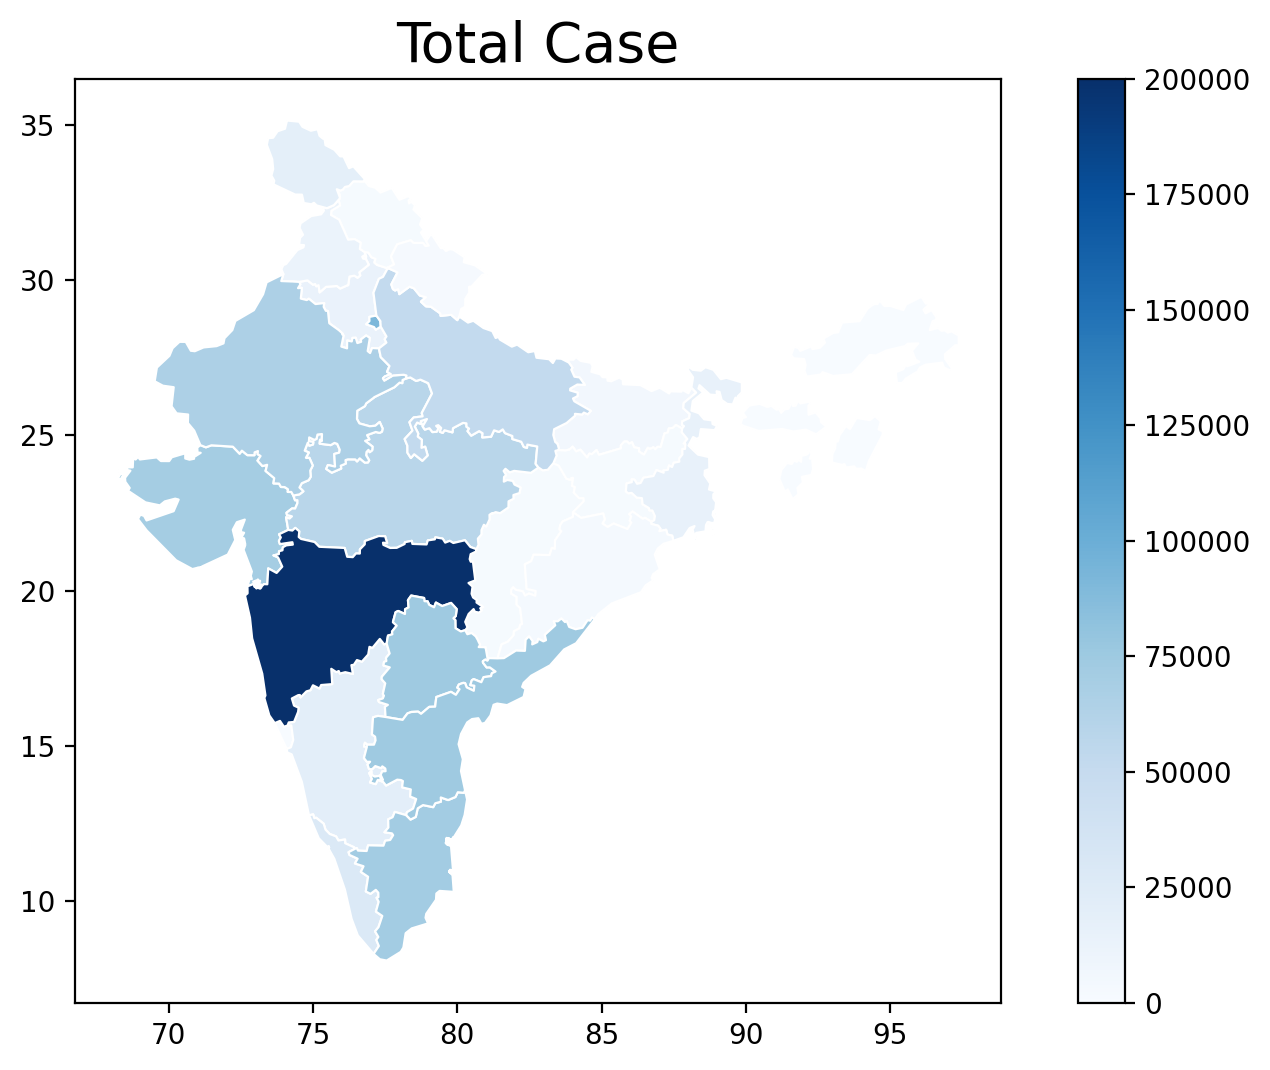

In [81]:
vmin, vmax = 0, 200000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# plot the data
final.plot(column='total_cases', cmap=plt.cm.Blues, linewidth=0.8, ax=ax, edgecolor='w')

# create a ScalarMappable and specify the colormap and normalization
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # empty array for the data range

# add the colorbar to the figure, specifying the Axes
cbar = fig.colorbar(sm, ax=ax)

# add the title
ax.set_title('Total Case', fontdict={'fontsize': '20', 'fontweight': '3'})

plt.show()

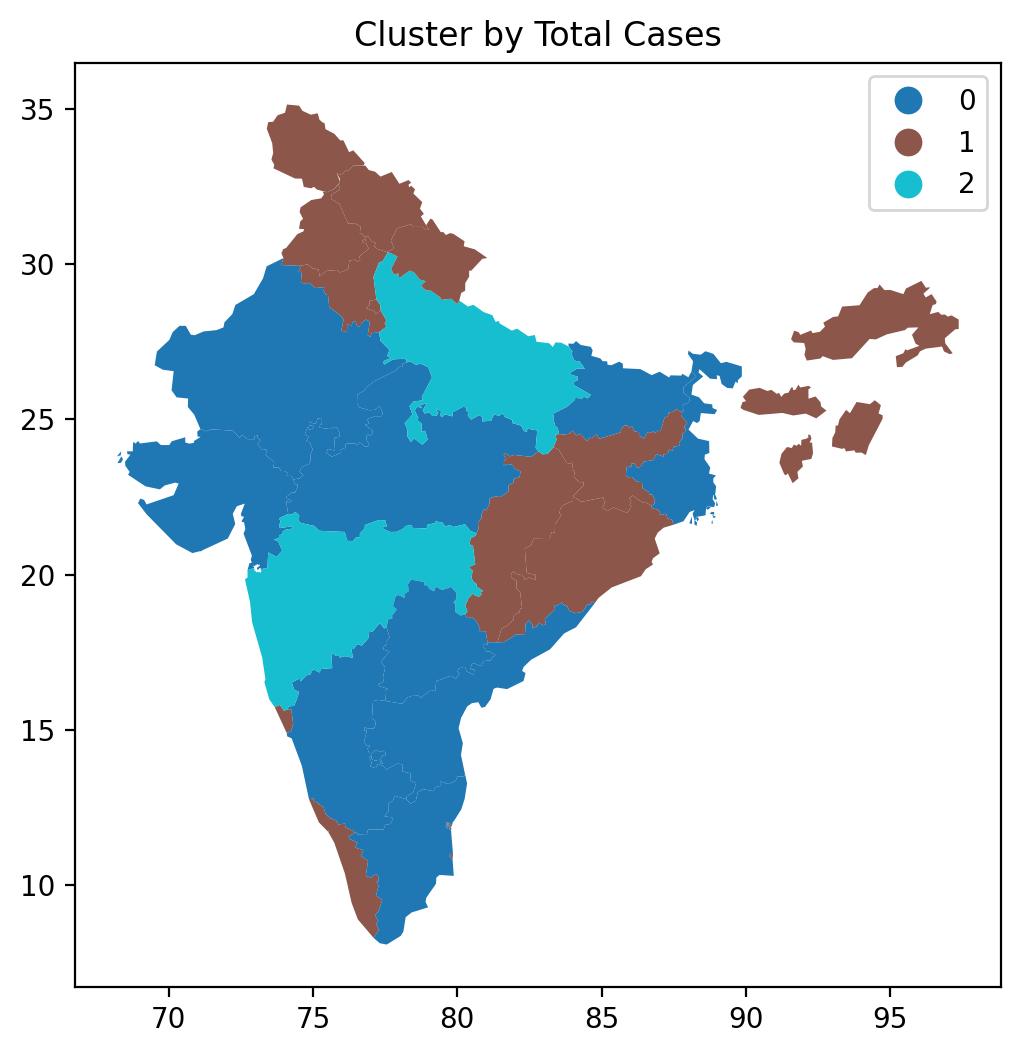

In [84]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(10, 6))
# Plot unique values choropleth including a legend and with no boundary lines
final.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)

# Add title
plt.title('Cluster by Total Cases')
# Display the map
plt.show()

In [85]:
# check the size for each cluster
k5sizes = final.groupby('k5cls').size()
k5sizes

k5cls
0     9
1    17
2     2
dtype: int64

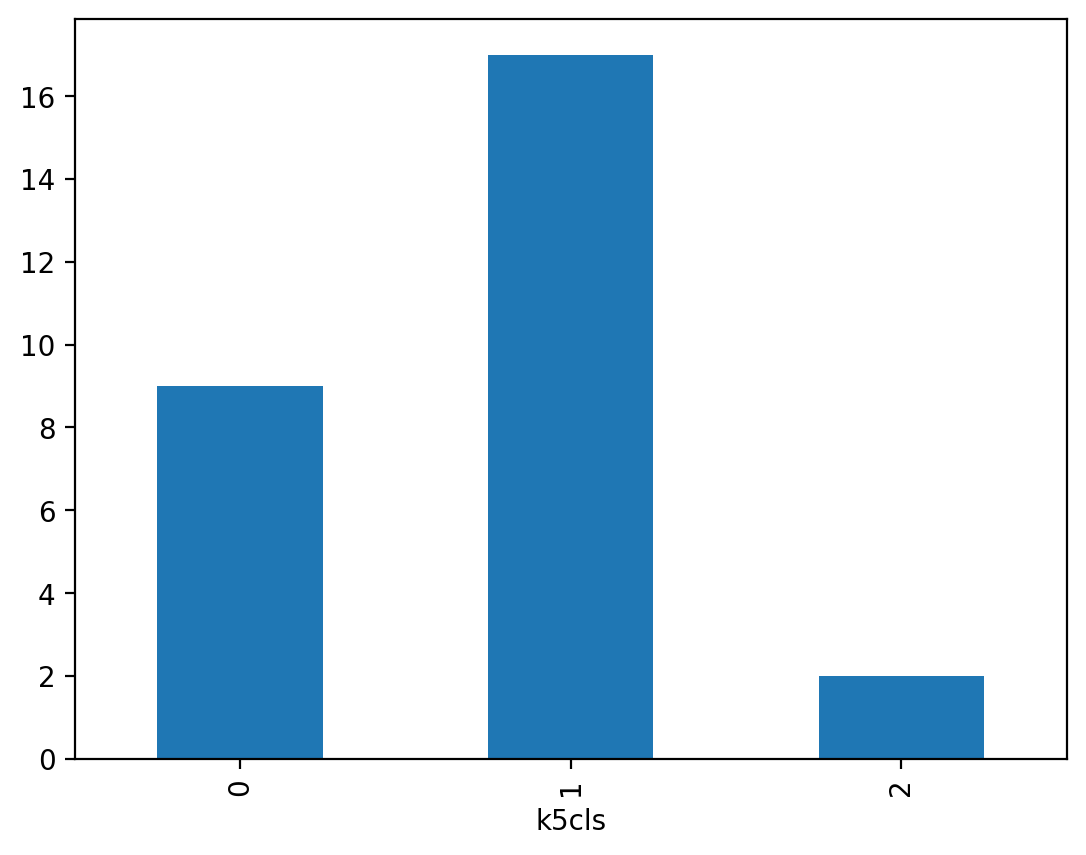

In [86]:
# create the plot bar for visualizing the size for each cluster
_ = k5sizes.plot.bar()

In [87]:
# Calculate the mean by group
k5means = final.groupby('k5cls')[variables7].mean()
# Show the table transposed (so it's not too wide)
k5means.T
#max_forst 2014 median= 21.4
#mean pollution = median = 945

k5cls,0,1,2
total_cases,2.061744e+04,4.283647e+03,5.101600e+04
mean_pollution,1.340648e+03,6.909044e+02,4.311490e+03
SlumPop,5.173014e+06,6.254308e+05,9.044194e+06
max_forest2014,1.642750e+01,3.836537e+01,1.613419e+01
WorkPop,3.281251e+07,5.680485e+06,5.762130e+07


There are 3 clusters: <br>

0. total_cases:Medium <br>
    mean_pollution : Medium<br>
    SlumPop: Medium<br>
    max_forest2014 : Medium<br>
    WorkPop: Medium<br>
    
1. total_cases:low<br>
    mean_pollution : low<br>
    SlumPop: low<br>
    max_forest2014 : high<br>
    WorkPop: low<br>
    
2. total_cases:High<br>
    mean_pollution : High<br>
    SlumPop: High<br>
    max_forest2014 : low<br>
    WorkPop: High<br>
    
**To focus on 0 and 2**
1. Can plant more tress to increase the max forest. 
2. Work from home to decrease the pollution by reducing energy consumption 

In [91]:
final.median(axis=0, numeric_only=True)

pc11_state_id                  1.800000e+01
TotHosp                        2.360000e+02
TotDocs                        2.384821e+03
UrbanShare                     1.577914e-01
PopDens                        6.102526e+02
SlumPop                        1.510411e+06
TotPop                         3.036574e+07
WorkPop                        1.189964e+07
mean_pollution                 9.458657e+02
num_cells                      1.278825e+02
total_forest2000               8.938503e+02
max_forest2000                 2.070358e+01
total_forest2001               1.016061e+03
max_forest2001                 2.276727e+01
total_forest2002               8.943658e+02
max_forest2002                 1.848341e+01
total_forest2003               8.666802e+02
max_forest2003                 1.806296e+01
total_forest2004               1.085805e+03
max_forest2004                 2.142353e+01
total_forest2005               1.091486e+03
max_forest2005                 1.944753e+01
total_forest2006               1

In [90]:
# Calculate the summary by group
k5desc = final.groupby('k5cls')[variables7].describe()
k5desc

total_cases                                                                          mean_pollution                                                                                            SlumPop                                                                                                max_forest2014                                                                              WorkPop                                                                                          
            count          mean           std      min      25%      50%      75%      max          count         mean          std          min          25%          50%          75%          max   count          mean           std        min           25%           50%           75%           max          count       mean        std        min        25%        50%        75%        max   count          mean           std         min          25%         50%          75%         max
k5cls                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0             9.0  20617.444444  11550.691149   2450.0   8168.0  26698.0  29235.0  30328.0            9.0  1340.647660   821.310171   388.339719   922.897678  1123.280780  1400.178462  2982.553352     9.0  5.173014e+06  3.416073e+06  1237682.0  2.068000e+06  5.688993e+06  6.418594e+06  1.018693e+07            9.0  16.427497   5.020507   6.643364  16.464320  17.103478  19.104716  23.502586     9.0  3.281251e+07  4.925108e+06  24767747.0  29886255.00  32884681.0  34756355.00  39422906.0
1            17.0   4283.647059   9036.886659     25.0    179.0    716.0   4951.0  36888.0           17.0   690.904392   554.884354    50.579904   340.974789   422.283249  1195.304972  1836.334298    17.0  6.254308e+05  7.240656e+05        0.0  6.131200e+04  2.020480e+05  1.460518e+06  1.898931e+06           17.0  38.365375  17.309496  15.419342  22.220348  35.000000  52.974148  76.386894    17.0  5.680485e+06  5.450987e+06    404136.0   1185619.00   3872275.0   9897362.00  17541589.0
2             2.0  51016.000000  42508.431258  20958.0  35987.0  51016.0  66045.0  81074.0            2.0  4311.490120  4135.526187  1387.231509  2849.360815  4311.490120  5773.619425  7235.748731     2.0  9.044194e+06  3.965779e+06  6239965.0  7.642080e+06  9.044194e+06  1.044631e+07  1.184842e+07            2.0  16.134194   3.122060  13.926564  15.030379  16.134194  17.238009  18.341824     2.0  5.762130e+07  1.158724e+07  49427878.0  53524587.25  57621296.5  61718005.75  65814715.0

cluster 0 = total_cases = 0-2450 (Low)>> <br>
Cluster 1 = 26698-3688 (med-high)>><br>
Cluster 2 = 81074 (high) >><br>
Cluster 3 = 4951-11715 (low-med)>><br>
cluster 4 = 20958 (medium)>><br>



In [92]:
# Name (index) the rows after the category they belong
to_plot = final.set_index('k5cls')
# Subset to keep only variables used in K-means clustering
to_plot = to_plot[variables7]
# Display top of the table
to_plot.sort_values('total_cases',ascending=True)

,total_cases,mean_pollution,SlumPop,max_forest2014,WorkPop
k5cls,,,,,
1,25,382.115899,1.556200e+04,76.386894,587657.0
1,38,357.536418,1.397800e+05,52.974148,1469521.0
1,59,340.974789,0.000000e+00,56.404966,1304610.0
1,132,385.537046,5.741800e+04,54.676154,1185619.0
1,179,109.129658,1.445730e+05,21.350000,444968.0
1,204,50.579904,2.624700e+04,45.815104,577248.0
1,669,71.595327,9.513500e+04,35.000000,404136.0
1,699,1299.783119,3.729990e+05,15.419342,13098274.0
1,716,1195.304972,1.898931e+06,19.573266,12180225.0


In [93]:
to_plot = to_plot.stack()
to_plot.head()

k5cls                
1      total_cases           25.000000
       mean_pollution       382.115899
       SlumPop            15562.000000
       max_forest2014        76.386894
       WorkPop           587657.000000
dtype: float64

In [94]:
# Calculate the mean by group
k5means = final.groupby('k5cls')[variables7].median()
# Show the table transposed (so it's not too wide)
k5means.T
#max_forst 2014 median= 21.4
#mean pollution = median = 945

k5cls,0,1,2
total_cases,2.669800e+04,7.160000e+02,5.101600e+04
mean_pollution,1.123281e+03,4.222832e+02,4.311490e+03
SlumPop,5.688993e+06,2.020480e+05,9.044194e+06
max_forest2014,1.710348e+01,3.500000e+01,1.613419e+01
WorkPop,3.288468e+07,3.872275e+06,5.762130e+07
